# Assignment No.16_ Neural_Network(Fire_Forests)

# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [224]:
!pip install keras
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [225]:
import pandas as pd
import numpy as np

In [226]:
ffire = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\forestfires.csv")


In [227]:
ffire.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

# EDA

In [228]:
ffire.shape # Rows and columns

(517, 31)

In [229]:
ffire.columns # Columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [230]:
#  To Rename The columns
ffire.columns = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'fri', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'size_category']

In [231]:
# Drop The Columns
ffire.drop(['fri', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'], axis = 1, inplace = True)

In [232]:
ffire.columns   # Check The column names

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [233]:
ffire.index #Rows

RangeIndex(start=0, stop=517, step=1)

In [234]:
ffire.info() # Data Types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [235]:
ffire.describe().T   # Discripttive statistics  # Here T is for Transformation

count        mean         std   min    25%     50%     75%      max
FFMC  517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC   517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC    517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI   517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp  517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH    517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind  517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain  517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area  517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84

In [236]:
ffire.isna().sum()   # Checking null values, there is no null values present in given dataset

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [237]:
ffire['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [238]:
ffire['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [239]:
ffire[ffire.duplicated()]   # In this dataset very few duplicate values, it may not effect major on prediction.

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0   0.00   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0   0.00   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00   

    size_category  
53          small  
100         small  
215         large  
303         small  
426         small  
461         small  
501         small  
508         small

In [240]:
ffire.corr()

FFMC       DMC        DC       ISI      temp        RH      wind  \
FFMC  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485   
DMC   0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.105342   
DC    0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192 -0.203466   
ISI   0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517  0.106826   
temp  0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390 -0.227116   
RH   -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000  0.069410   
wind -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410  1.000000   
rain  0.056702  0.074790  0.035861  0.067668  0.069491  0.099751  0.061119   
area  0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519  0.012317   

          rain      area  
FFMC  0.056702  0.040122  
DMC   0.074790  0.072994  
DC    0.035861  0.049383  
ISI   0.067668  0.008258  
temp  0.069491  0.097844  
RH    0.099751 -0.075519  
wind  0.061119  0.012317  
rain  1.000000 -0.007366  
area -0.007366  1.000000

# Visualization

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

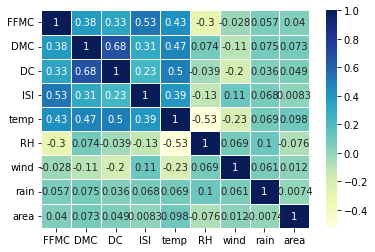

In [242]:
sns.heatmap(ffire.corr(), cmap = "YlGnBu", linewidth = 1, annot = True) # annot= True for label the values
plt.show()

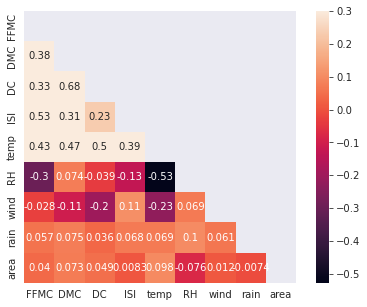

In [243]:
corr = ffire.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):  # Styel must be: white, whitegrid, dark, darkgrid.
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr,mask=mask, vmax=.3, square=True, annot = True)

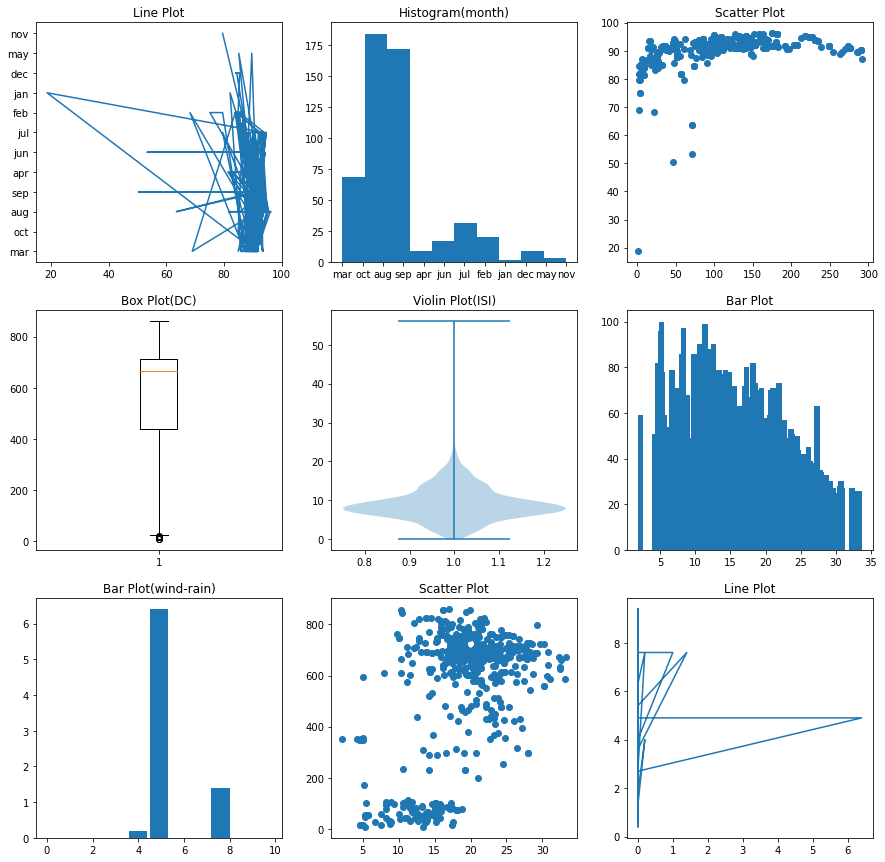

In [244]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize =(15,15))
ax[0,0].plot('FFMC','month', data = ffire);ax[0,0].set_title("Line Plot")
ax[0,1].hist('month', data = ffire);ax[0,1].set_title("Histogram(month)")
ax[0,2].scatter('DMC', 'FFMC', data = ffire);ax[0,2].set_title("Scatter Plot")
ax[1,0].boxplot('DC', data = ffire);ax[1,0].set_title("Box Plot(DC)")
ax[1,1].violinplot('ISI', data = ffire);ax[1,1].set_title("Violin Plot(ISI)")
ax[1,2].bar('temp','RH', data = ffire);ax[1,2].set_title("Bar Plot")
ax[2,0].bar(ffire['wind'], ffire["rain"]);ax[2,0].set_title("Bar Plot(wind-rain)")
ax[2,1].scatter('temp','DC', data = ffire);ax[2,1].set_title("Scatter Plot")
ax[2,2].plot('rain','wind', data = ffire);ax[2,2].set_title("Line Plot")
plt.show()

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3543: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


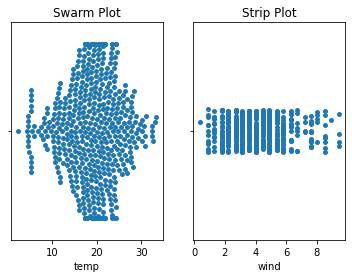

In [245]:
plt.subplot(1,2,1)
sns.swarmplot(x = 'temp', data = ffire); plt.title("Swarm Plot")
plt.subplot(1,2,2)
sns.stripplot(x = 'wind', data = ffire);plt.title("Strip Plot")
plt.show()

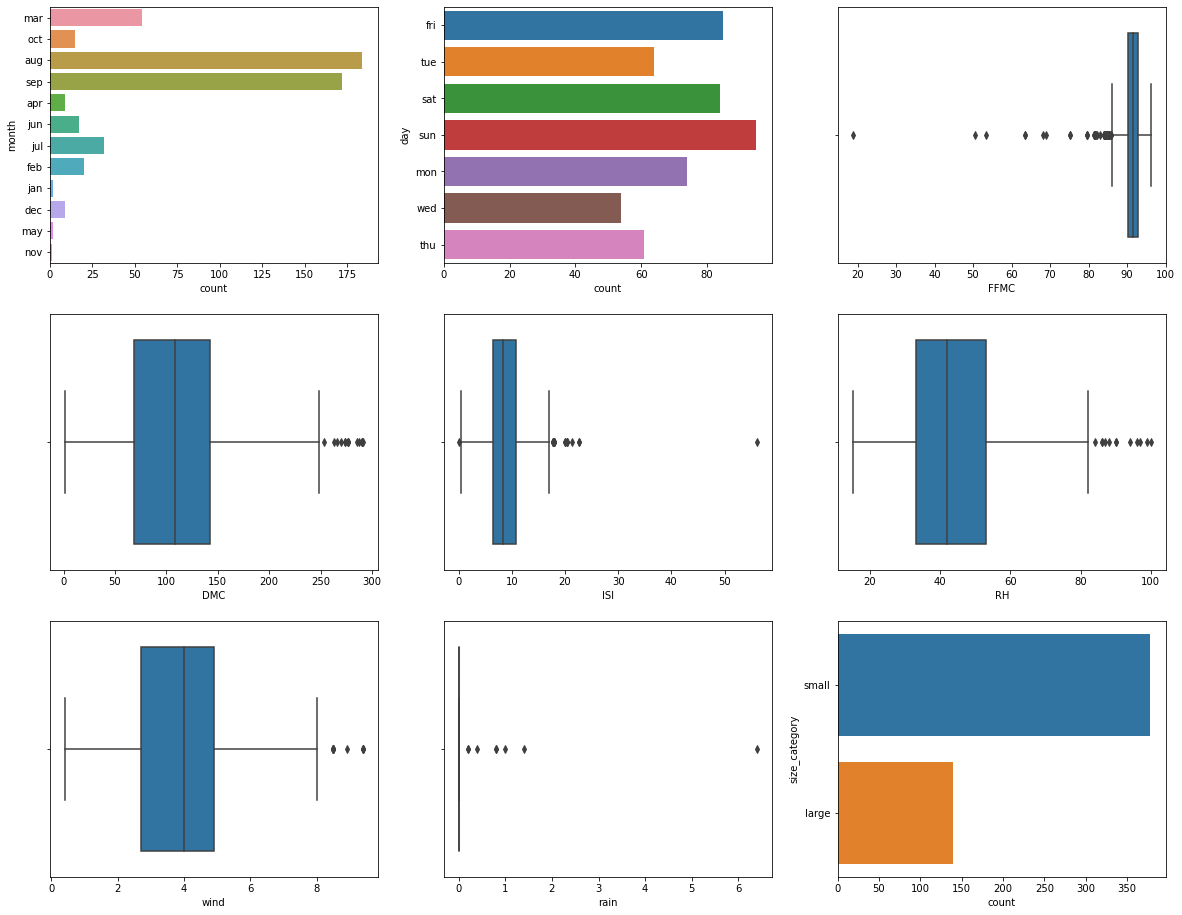

In [246]:
plt.subplots(figsize=(20,16))

[plt.subplot(3,3,1), sns.countplot(data=ffire, y='month')];

[plt.subplot(3,3,2), sns.countplot(data=ffire, y='day')];

[plt.subplot(3,3,3), sns.boxplot(x=ffire["FFMC"])];

[plt.subplot(3,3,4), sns.boxplot(x=ffire["DMC"])];

[plt.subplot(3,3,5), sns.boxplot(x=ffire["ISI"])];

[plt.subplot(3,3,6), sns.boxplot(x=ffire["RH"])];

[plt.subplot(3,3,7), sns.boxplot(x=ffire["wind"])];

[plt.subplot(3,3,8), sns.boxplot(x=ffire["rain"])];

[plt.subplot(3,3,9), sns.countplot(data=ffire, y='size_category')];
plt.show()

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


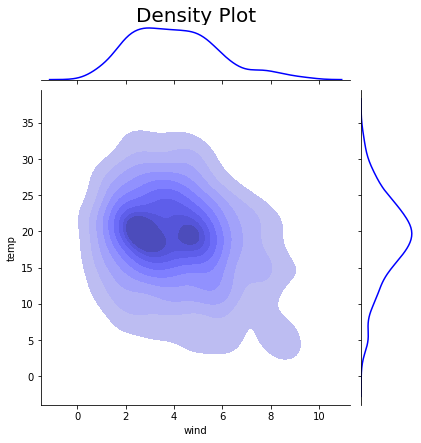

In [247]:
sns.jointplot(x = 'wind', y='temp', data = ffire,kind ='kde', shade = True, color = 'blue')  # shade = True: filed with color shape
plt.title("Density Plot", size = 20, y = 1.2)
plt.show()

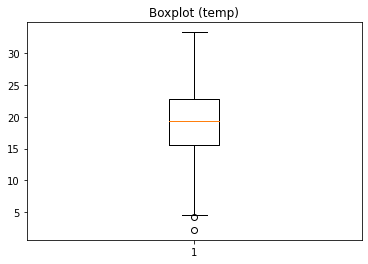

In [248]:
# Boxplot for outlier detection
plt.boxplot(ffire['temp']); plt.title("Boxplot (temp)")
plt.show()

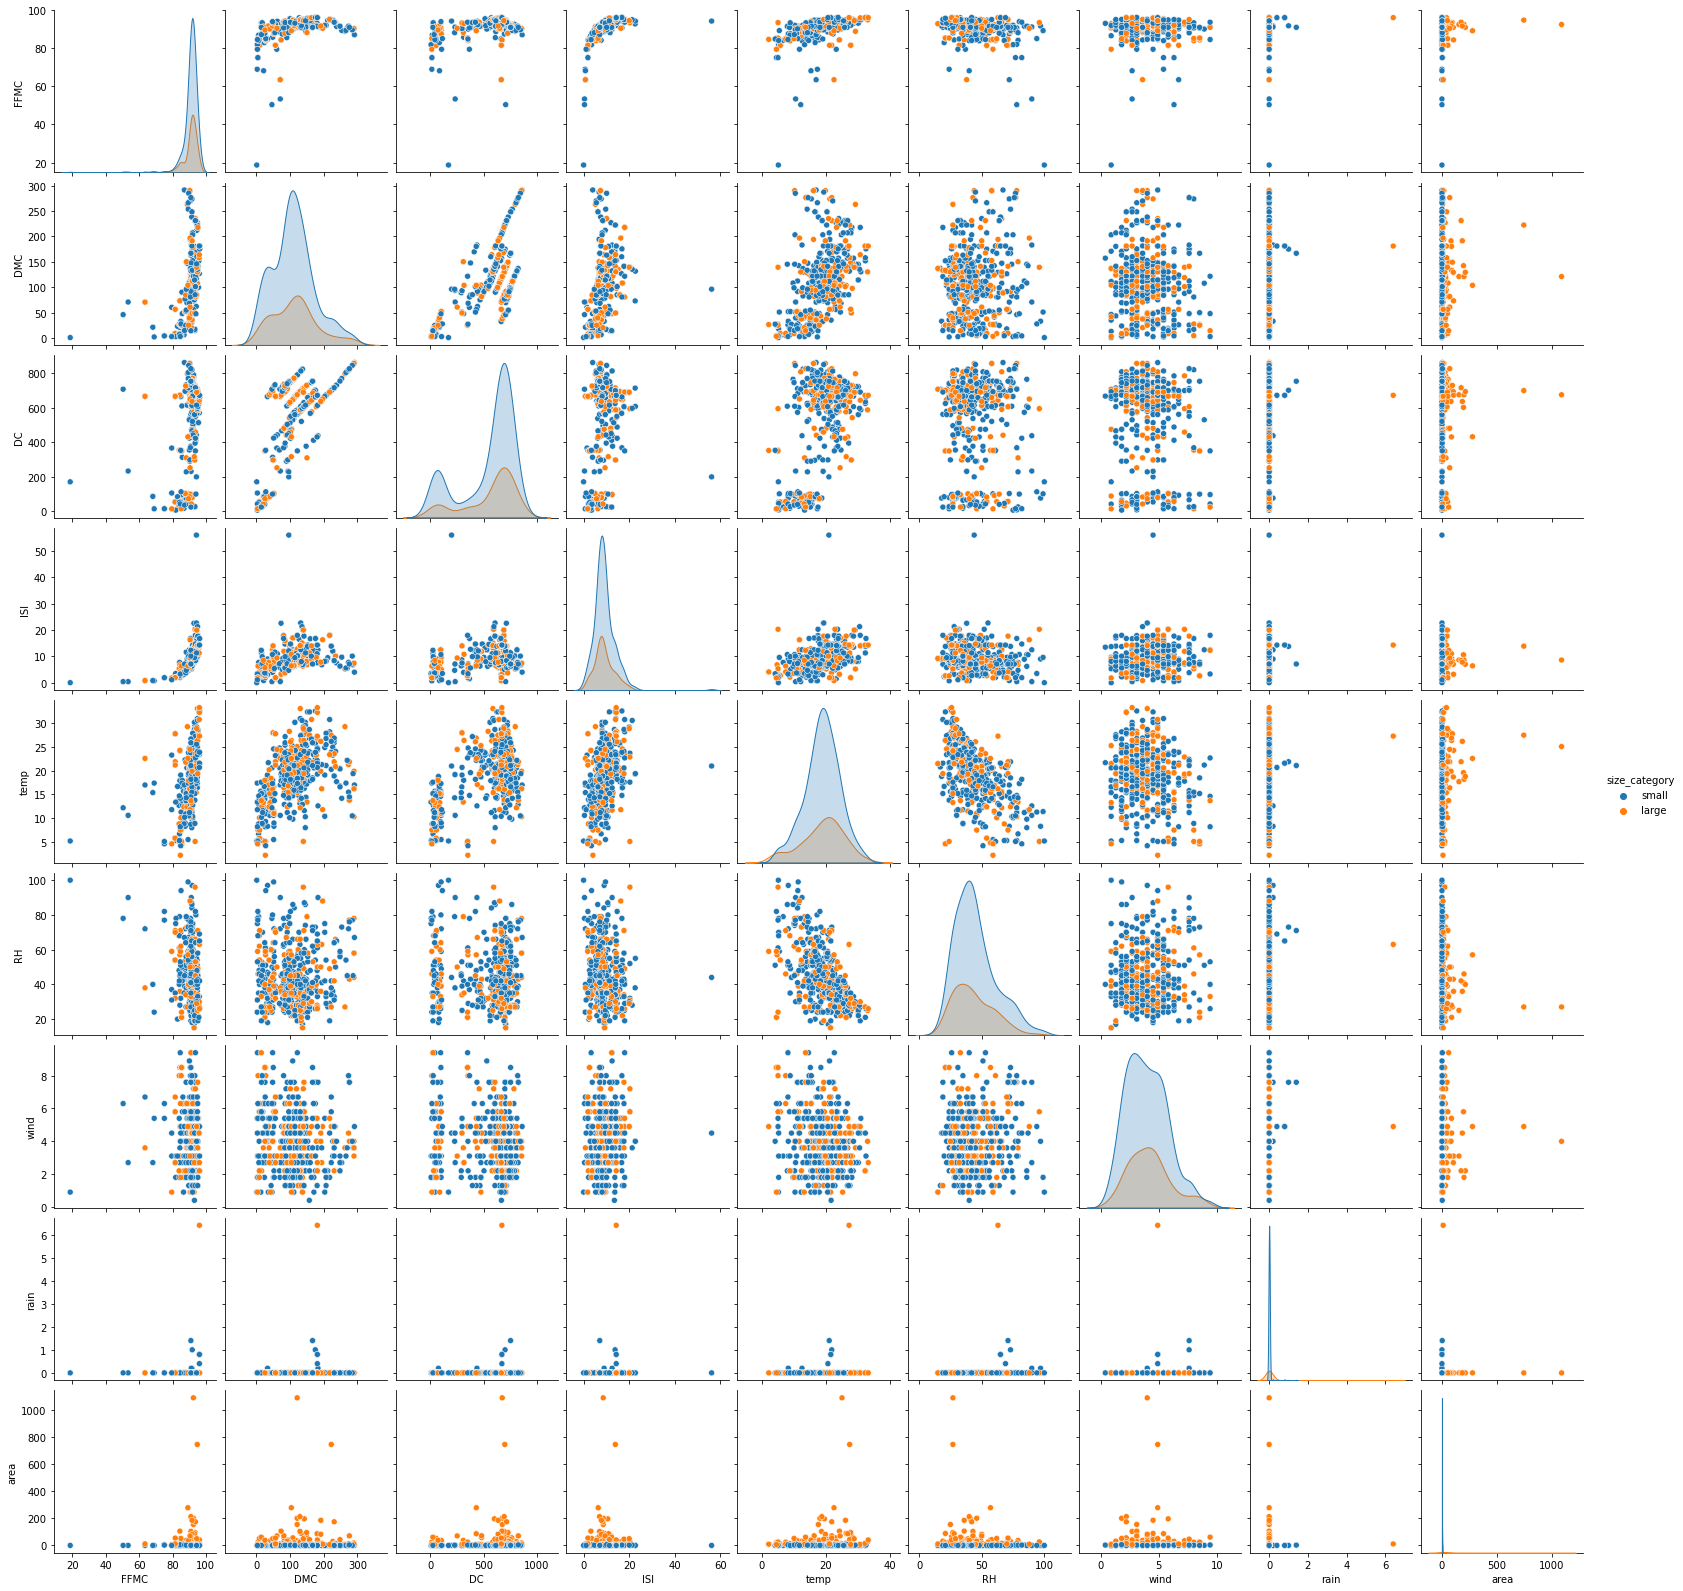

In [249]:
# Plotting pairplot for visualize all the attributes in one plot
sns.pairplot(ffire, hue = 'size_category')
plt.show()

# Neural Network

In [250]:
from keras.models import Sequential
from keras.layers import Dense, LSTM    # we can use LSTM instead if Dense
from sklearn import preprocessing  

In [251]:
# Convert All The Categorical Variables To Numeric
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
ffire['month'] = LE.fit_transform(ffire['month'])
ffire['day'] = LE.fit_transform(ffire['day'])
ffire['size_category'] = LE.fit_transform(ffire['size_category'])

In [252]:
X = ffire.iloc[:,2:-1]
Y = ffire.iloc[:,-1]
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32


In [253]:
X

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..    ...    ...    ...   ...   ...  ..   ...   ...    ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 9 columns]

In [254]:
model = Sequential()
model.add(Dense(12, input_dim =9, activation ="relu", name = 'input_layer_Dense'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

In [255]:
# Now For Compile Model
model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model

In [256]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_Dense (Dense)   (None, 12)                120       
                                                                 
 dense_15 (Dense)            (None, 8)                 104       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [257]:
# Fit the model
fit_model = model.fit(X, Y, validation_split = 0.33 , epochs = 250, batch_size = 10)

Epoch 1/250
35/35 [==============================] - 5s 20ms/step - loss: 1.4011 - accuracy: 0.7052 - val_loss: 2.8640 - val_accuracy: 0.6725
Epoch 2/250
35/35 [==============================] - 0s 6ms/step - loss: 0.8949 - accuracy: 0.6994 - val_loss: 2.1017 - val_accuracy: 0.6082
Epoch 3/250
35/35 [==============================] - 0s 6ms/step - loss: 0.7017 - accuracy: 0.7110 - val_loss: 1.8740 - val_accuracy: 0.6433
Epoch 4/250
35/35 [==============================] - 0s 6ms/step - loss: 0.6357 - accuracy: 0.7283 - val_loss: 1.7521 - val_accuracy: 0.6608
Epoch 5/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5962 - accuracy: 0.7717 - val_loss: 1.7568 - val_accuracy: 0.6784
Epoch 6/250
35/35 [==============================] - 0s 5ms/step - loss: 0.5791 - accuracy: 0.7746 - val_loss: 1.6016 - val_accuracy: 0.6667
Epoch 7/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5594 - accuracy: 0.7832 - val_loss: 1.4860 - val_accuracy: 0.6667
Epoch 8/250


Epoch 59/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0353 - accuracy: 0.9913 - val_loss: 0.0887 - val_accuracy: 0.9591
Epoch 60/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9855 - val_loss: 0.1021 - val_accuracy: 0.9474
Epoch 61/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.9942 - val_loss: 0.0794 - val_accuracy: 0.9649
Epoch 62/250
35/35 [==============================] - 0s 11ms/step - loss: 0.0329 - accuracy: 0.9913 - val_loss: 0.1926 - val_accuracy: 0.9240
Epoch 63/250
35/35 [==============================] - 0s 10ms/step - loss: 0.1885 - accuracy: 0.9509 - val_loss: 0.4368 - val_accuracy: 0.8421
Epoch 64/250
35/35 [==============================] - 0s 7ms/step - loss: 0.1329 - accuracy: 0.9595 - val_loss: 0.2806 - val_accuracy: 0.8947
Epoch 65/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0679 - accuracy: 0.9740 - val_loss: 0.0912 - val_accuracy: 0.9532
Epoc

35/35 [==============================] - 0s 6ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0924 - val_accuracy: 0.9649
Epoch 117/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0250 - accuracy: 0.9913 - val_loss: 0.3426 - val_accuracy: 0.9006
Epoch 118/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0421 - accuracy: 0.9827 - val_loss: 0.1062 - val_accuracy: 0.9649
Epoch 119/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0299 - accuracy: 0.9942 - val_loss: 0.0805 - val_accuracy: 0.9532
Epoch 120/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0294 - accuracy: 0.9913 - val_loss: 0.1138 - val_accuracy: 0.9474
Epoch 121/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0255 - accuracy: 0.9913 - val_loss: 0.1085 - val_accuracy: 0.9532
Epoch 122/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.1037 - val_accuracy: 0.9649
Epoch 123/250

35/35 [==============================] - 0s 6ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0745 - val_accuracy: 0.9766
Epoch 174/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0291 - accuracy: 0.9855 - val_loss: 0.0811 - val_accuracy: 0.9708
Epoch 175/250
35/35 [==============================] - 0s 9ms/step - loss: 0.0501 - accuracy: 0.9740 - val_loss: 0.1676 - val_accuracy: 0.9474
Epoch 176/250
35/35 [==============================] - 0s 10ms/step - loss: 0.0287 - accuracy: 0.9827 - val_loss: 0.0749 - val_accuracy: 0.9591
Epoch 177/250
35/35 [==============================] - 0s 9ms/step - loss: 0.0193 - accuracy: 0.9913 - val_loss: 0.0705 - val_accuracy: 0.9591
Epoch 178/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0214 - accuracy: 0.9971 - val_loss: 0.0752 - val_accuracy: 0.9766
Epoch 179/250
35/35 [==============================] - 0s 8ms/step - loss: 0.0187 - accuracy: 0.9971 - val_loss: 0.0686 - val_accuracy: 0.9649
Epoch 180/25

35/35 [==============================] - 0s 7ms/step - loss: 0.0588 - accuracy: 0.9827 - val_loss: 0.0792 - val_accuracy: 0.9708
Epoch 231/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0317 - accuracy: 0.9884 - val_loss: 0.0959 - val_accuracy: 0.9708
Epoch 232/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0425 - accuracy: 0.9798 - val_loss: 0.0849 - val_accuracy: 0.9766
Epoch 233/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.0741 - val_accuracy: 0.9649
Epoch 234/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.9827 - val_loss: 0.0830 - val_accuracy: 0.9591
Epoch 235/250
35/35 [==============================] - 0s 8ms/step - loss: 0.0214 - accuracy: 0.9942 - val_loss: 0.0709 - val_accuracy: 0.9649
Epoch 236/250
35/35 [==============================] - 0s 8ms/step - loss: 0.0124 - accuracy: 0.9971 - val_loss: 0.0708 - val_accuracy: 0.9649
Epoch 237/250

In [258]:
# Fit the model
fit_model = model.fit(X, Y, validation_split = 0.33 , epochs = 250, batch_size = 10)

Epoch 1/250
35/35 [==============================] - 0s 10ms/step - loss: 0.0279 - accuracy: 0.9827 - val_loss: 0.1165 - val_accuracy: 0.9532
Epoch 2/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.9798 - val_loss: 0.1198 - val_accuracy: 0.9532
Epoch 3/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9913 - val_loss: 0.1494 - val_accuracy: 0.9649
Epoch 4/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0237 - accuracy: 0.9884 - val_loss: 0.0721 - val_accuracy: 0.9708
Epoch 5/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0183 - accuracy: 0.9913 - val_loss: 0.1278 - val_accuracy: 0.9649
Epoch 6/250
35/35 [==============================] - 0s 8ms/step - loss: 0.0205 - accuracy: 0.9942 - val_loss: 0.0771 - val_accuracy: 0.9766
Epoch 7/250
35/35 [==============================] - 0s 10ms/step - loss: 0.0249 - accuracy: 0.9942 - val_loss: 0.0793 - val_accuracy: 0.9708
Epoch 8/250

35/35 [==============================] - 0s 9ms/step - loss: 0.0311 - accuracy: 0.9884 - val_loss: 0.0747 - val_accuracy: 0.9649
Epoch 59/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.0832 - val_accuracy: 0.9766
Epoch 60/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0268 - accuracy: 0.9855 - val_loss: 0.1972 - val_accuracy: 0.9532
Epoch 61/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0416 - accuracy: 0.9827 - val_loss: 0.0832 - val_accuracy: 0.9591
Epoch 62/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0299 - accuracy: 0.9855 - val_loss: 0.1202 - val_accuracy: 0.9708
Epoch 63/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0225 - accuracy: 0.9913 - val_loss: 0.0801 - val_accuracy: 0.9766
Epoch 64/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0157 - accuracy: 0.9913 - val_loss: 0.1054 - val_accuracy: 0.9708
Epoch 65/250
35/35 

35/35 [==============================] - 0s 6ms/step - loss: 0.0143 - accuracy: 0.9971 - val_loss: 0.0875 - val_accuracy: 0.9708
Epoch 116/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0278 - accuracy: 0.9884 - val_loss: 0.0804 - val_accuracy: 0.9649
Epoch 117/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0147 - accuracy: 0.9942 - val_loss: 0.1091 - val_accuracy: 0.9591
Epoch 118/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0280 - accuracy: 0.9855 - val_loss: 0.1909 - val_accuracy: 0.9532
Epoch 119/250
35/35 [==============================] - 0s 6ms/step - loss: 0.1148 - accuracy: 0.9711 - val_loss: 0.3365 - val_accuracy: 0.9181
Epoch 120/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0699 - accuracy: 0.9682 - val_loss: 0.2787 - val_accuracy: 0.9532
Epoch 121/250
35/35 [==============================] - 0s 6ms/step - loss: 0.1377 - accuracy: 0.9509 - val_loss: 0.2469 - val_accuracy: 0.9240
Epoch 122/250

35/35 [==============================] - 0s 7ms/step - loss: 0.0143 - accuracy: 0.9942 - val_loss: 0.0791 - val_accuracy: 0.9708
Epoch 173/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.1346 - val_accuracy: 0.9649
Epoch 174/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9884 - val_loss: 0.0783 - val_accuracy: 0.9649
Epoch 175/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0128 - accuracy: 0.9913 - val_loss: 0.0884 - val_accuracy: 0.9766
Epoch 176/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.9913 - val_loss: 0.3178 - val_accuracy: 0.9298
Epoch 177/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0285 - accuracy: 0.9884 - val_loss: 0.1715 - val_accuracy: 0.9591
Epoch 178/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0239 - accuracy: 0.9855 - val_loss: 0.0771 - val_accuracy: 0.9708
Epoch 179/250

35/35 [==============================] - 0s 6ms/step - loss: 0.0158 - accuracy: 0.9942 - val_loss: 0.1190 - val_accuracy: 0.9708
Epoch 230/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0168 - accuracy: 0.9884 - val_loss: 0.1351 - val_accuracy: 0.9649
Epoch 231/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0238 - accuracy: 0.9827 - val_loss: 0.0888 - val_accuracy: 0.9766
Epoch 232/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0574 - accuracy: 0.9798 - val_loss: 0.0832 - val_accuracy: 0.9649
Epoch 233/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0319 - accuracy: 0.9913 - val_loss: 0.0952 - val_accuracy: 0.9591
Epoch 234/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0302 - accuracy: 0.9798 - val_loss: 0.1193 - val_accuracy: 0.9708
Epoch 235/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 0.9971 - val_loss: 0.2272 - val_accuracy: 0.9474
Epoch 236/250

In [259]:
# Evaluating the Model
score1 = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], score1[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9865
accuracy: 98.65%


In [260]:
model.metrics_names

['loss', 'accuracy']

In [261]:
# Visualzation of Training History
fit_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [262]:
fit_model.history['accuracy']

[0.9826589822769165,
 0.9797688126564026,
 0.9913294911384583,
 0.9884393215179443,
 0.9913294911384583,
 0.9942196607589722,
 0.9942196607589722,
 0.9942196607589722,
 0.9971098303794861,
 0.9884393215179443,
 0.9971098303794861,
 0.9826589822769165,
 0.9942196607589722,
 0.9884393215179443,
 0.9942196607589722,
 0.9971098303794861,
 0.9884393215179443,
 0.9942196607589722,
 0.9913294911384583,
 0.9913294911384583,
 0.9855491518974304,
 0.9884393215179443,
 0.9884393215179443,
 0.9797688126564026,
 0.9913294911384583,
 0.9913294911384583,
 0.9913294911384583,
 0.9942196607589722,
 0.9826589822769165,
 0.9971098303794861,
 0.9942196607589722,
 0.9826589822769165,
 0.9971098303794861,
 0.9913294911384583,
 0.9942196607589722,
 0.9942196607589722,
 0.9942196607589722,
 0.9942196607589722,
 0.9942196607589722,
 0.9971098303794861,
 0.9942196607589722,
 0.97398841381073,
 0.9913294911384583,
 0.9942196607589722,
 0.9971098303794861,
 0.9826589822769165,
 1.0,
 0.9855491518974304,
 0.991329

In [263]:
fit_model.history['val_accuracy']

[0.9532163739204407,
 0.9532163739204407,
 0.9649122953414917,
 0.9707602262496948,
 0.9649122953414917,
 0.9766082167625427,
 0.9707602262496948,
 0.9649122953414917,
 0.9122806787490845,
 0.9707602262496948,
 0.9649122953414917,
 0.9649122953414917,
 0.9707602262496948,
 0.9415204524993896,
 0.9707602262496948,
 0.9590643048286438,
 0.9707602262496948,
 0.9649122953414917,
 0.9649122953414917,
 0.9707602262496948,
 0.9532163739204407,
 0.9649122953414917,
 0.9707602262496948,
 0.9649122953414917,
 0.9473684430122375,
 0.9707602262496948,
 0.9298245906829834,
 0.9707602262496948,
 0.9766082167625427,
 0.9707602262496948,
 0.9649122953414917,
 0.9473684430122375,
 0.9590643048286438,
 0.9590643048286438,
 0.9532163739204407,
 0.9707602262496948,
 0.9707602262496948,
 0.9590643048286438,
 0.9707602262496948,
 0.9649122953414917,
 0.9707602262496948,
 0.9766082167625427,
 0.9649122953414917,
 0.9707602262496948,
 0.9473684430122375,
 0.9649122953414917,
 0.9532163739204407,
 0.9649122953

In [264]:
fit_model.history['loss']

[0.027934374287724495,
 0.034978121519088745,
 0.02041555568575859,
 0.023672930896282196,
 0.018319642171263695,
 0.02054986171424389,
 0.024942897260189056,
 0.01438121311366558,
 0.013634735718369484,
 0.024473462253808975,
 0.01286381483078003,
 0.032023340463638306,
 0.012783274054527283,
 0.03215763345360756,
 0.016335319727659225,
 0.017946626991033554,
 0.02407596819102764,
 0.019202282652258873,
 0.01304056216031313,
 0.020836705341935158,
 0.03981517627835274,
 0.033666014671325684,
 0.021701805293560028,
 0.05341081693768501,
 0.01911860704421997,
 0.03113514557480812,
 0.022021614015102386,
 0.02134690061211586,
 0.041480980813503265,
 0.01468009315431118,
 0.016204142943024635,
 0.02606683224439621,
 0.012070925906300545,
 0.019115785136818886,
 0.019000403583049774,
 0.01398594118654728,
 0.016194075345993042,
 0.01924162171781063,
 0.01876741461455822,
 0.016783637925982475,
 0.024740053340792656,
 0.04197176173329353,
 0.014796474948525429,
 0.015377441421151161,
 0.014

In [265]:
fit_model.history['val_loss']

[0.11650469154119492,
 0.11976917833089828,
 0.14938229322433472,
 0.07212957739830017,
 0.127776637673378,
 0.07712806761264801,
 0.0792505294084549,
 0.07322381436824799,
 0.3003047704696655,
 0.07495341449975967,
 0.11752629280090332,
 0.0733250305056572,
 0.10409336537122726,
 0.17834444344043732,
 0.07610847055912018,
 0.15389567613601685,
 0.0917360931634903,
 0.07199251651763916,
 0.12018203735351562,
 0.07692191749811172,
 0.1033114641904831,
 0.14305981993675232,
 0.07427969574928284,
 0.10993892699480057,
 0.14727993309497833,
 0.07772006094455719,
 0.2482828050851822,
 0.07836537063121796,
 0.08083266764879227,
 0.07742126286029816,
 0.07891234755516052,
 0.14183084666728973,
 0.08518102765083313,
 0.09083235263824463,
 0.18518635630607605,
 0.08476558327674866,
 0.07707306742668152,
 0.0846715196967125,
 0.08041420578956604,
 0.08102305233478546,
 0.10453562438488007,
 0.07907195389270782,
 0.0723889172077179,
 0.08727617561817169,
 0.13251332938671112,
 0.11402661353349686

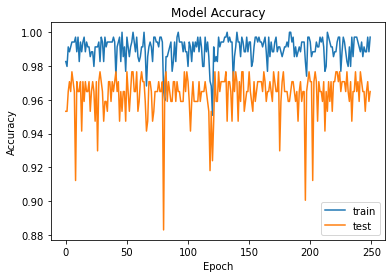

In [266]:
 # summarizaion of history for accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

As Per Graphs, Accuracy On Train And Test Both Are Almost Parallel To each Other

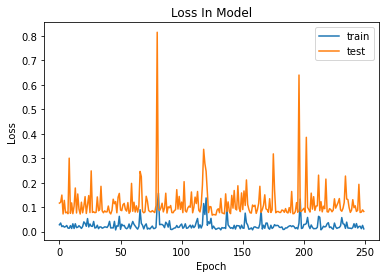

In [267]:
## summarization Of History For Loss
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('Loss In Model')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

As per graphs, Loss on Train and Test Both are almost parallel to each Other.

In [268]:
predictions = model.predict(X)

17/17 [==============================] - 0s 2ms/step


# Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [269]:
# Fix Random seed For Reproducibility
seed2 = 9
np.random.seed(seed2)

In [270]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential() # 0 level
model2.add(Dense(14, input_dim=9,  activation='linear')) #1st layer
model2.add(Dense(9,  activation='linear')) #2nd layer
model2.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [271]:
# Compile Model
# Changing Optimizerolder=ada, new=adadel ta

model2.compile(loss='binary_crossentropy', optimizer='adadelta',metrics=['accuracy'])

In [272]:
# Fit the model
# Change ephocs from 250 to 200

fit_model2=model2.fit(X,Y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 3s 19ms/step - loss: 36.6668 - accuracy: 0.7572 - val_loss: 46.0463 - val_accuracy: 0.6725
Epoch 2/200
35/35 [==============================] - 0s 6ms/step - loss: 36.5973 - accuracy: 0.7572 - val_loss: 45.9395 - val_accuracy: 0.6725
Epoch 3/200
35/35 [==============================] - 0s 6ms/step - loss: 36.5263 - accuracy: 0.7572 - val_loss: 45.8319 - val_accuracy: 0.6725
Epoch 4/200
35/35 [==============================] - 0s 6ms/step - loss: 36.4547 - accuracy: 0.7572 - val_loss: 45.7242 - val_accuracy: 0.6725
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 36.3832 - accuracy: 0.7572 - val_loss: 45.6150 - val_accuracy: 0.6725
Epoch 6/200
35/35 [==============================] - 0s 6ms/step - loss: 36.3105 - accuracy: 0.7572 - val_loss: 45.5022 - val_accuracy: 0.6725
Epoch 7/200
35/35 [==============================] - 0s 5ms/step - loss: 36.2359 - accuracy: 0.7572 - val_loss: 45.3908 - val_accuracy: 0.672

Epoch 58/200
35/35 [==============================] - 0s 6ms/step - loss: 32.2786 - accuracy: 0.7514 - val_loss: 39.3686 - val_accuracy: 0.6667
Epoch 59/200
35/35 [==============================] - 0s 5ms/step - loss: 32.2026 - accuracy: 0.7514 - val_loss: 39.2521 - val_accuracy: 0.6667
Epoch 60/200
35/35 [==============================] - 0s 6ms/step - loss: 32.1261 - accuracy: 0.7514 - val_loss: 39.1373 - val_accuracy: 0.6667
Epoch 61/200
35/35 [==============================] - 0s 5ms/step - loss: 32.0505 - accuracy: 0.7514 - val_loss: 39.0211 - val_accuracy: 0.6667
Epoch 62/200
35/35 [==============================] - 0s 6ms/step - loss: 31.9753 - accuracy: 0.7514 - val_loss: 38.9090 - val_accuracy: 0.6667
Epoch 63/200
35/35 [==============================] - 0s 6ms/step - loss: 31.9017 - accuracy: 0.7514 - val_loss: 38.7945 - val_accuracy: 0.6667
Epoch 64/200
35/35 [==============================] - 0s 6ms/step - loss: 31.8263 - accuracy: 0.7514 - val_loss: 38.6792 - val_accuracy:

Epoch 115/200
35/35 [==============================] - 0s 6ms/step - loss: 27.9658 - accuracy: 0.7399 - val_loss: 32.7449 - val_accuracy: 0.6608
Epoch 116/200
35/35 [==============================] - 0s 5ms/step - loss: 27.8932 - accuracy: 0.7399 - val_loss: 32.6338 - val_accuracy: 0.6608
Epoch 117/200
35/35 [==============================] - 0s 5ms/step - loss: 27.8208 - accuracy: 0.7399 - val_loss: 32.5197 - val_accuracy: 0.6608
Epoch 118/200
35/35 [==============================] - 0s 6ms/step - loss: 27.7479 - accuracy: 0.7399 - val_loss: 32.4108 - val_accuracy: 0.6608
Epoch 119/200
35/35 [==============================] - 0s 5ms/step - loss: 27.6781 - accuracy: 0.7399 - val_loss: 32.2998 - val_accuracy: 0.6608
Epoch 120/200
35/35 [==============================] - 0s 5ms/step - loss: 27.6069 - accuracy: 0.7399 - val_loss: 32.1895 - val_accuracy: 0.6608
Epoch 121/200
35/35 [==============================] - 0s 6ms/step - loss: 27.5369 - accuracy: 0.7399 - val_loss: 32.0829 - val_ac

35/35 [==============================] - 0s 9ms/step - loss: 24.1974 - accuracy: 0.7110 - val_loss: 26.7979 - val_accuracy: 0.6550
Epoch 172/200
35/35 [==============================] - 0s 8ms/step - loss: 24.1324 - accuracy: 0.7110 - val_loss: 26.6921 - val_accuracy: 0.6550
Epoch 173/200
35/35 [==============================] - 0s 9ms/step - loss: 24.0670 - accuracy: 0.7110 - val_loss: 26.5872 - val_accuracy: 0.6550
Epoch 174/200
35/35 [==============================] - 0s 5ms/step - loss: 24.0034 - accuracy: 0.7110 - val_loss: 26.4834 - val_accuracy: 0.6550
Epoch 175/200
35/35 [==============================] - 0s 9ms/step - loss: 23.9393 - accuracy: 0.7110 - val_loss: 26.3771 - val_accuracy: 0.6550
Epoch 176/200
35/35 [==============================] - 0s 8ms/step - loss: 23.8740 - accuracy: 0.7110 - val_loss: 26.2726 - val_accuracy: 0.6550
Epoch 177/200
35/35 [==============================] - 0s 6ms/step - loss: 23.8103 - accuracy: 0.7081 - val_loss: 26.1674 - val_accuracy: 0.6550

In [273]:
# Evaluating The Model

score2 = model2.evaluate(X,Y)
print("%s: %2f%%" % (model2.metrics_names[1], score2[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 22.7668 - accuracy: 0.6828
accuracy: 68.278527%


In [274]:
# Visualzation of Training History, metric Name And Score

model2.metrics_names, score2, fit_model2.history.keys()

(['loss', 'accuracy'],
 [22.766801834106445, 0.6827852725982666],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [275]:
fit_model2.history['accuracy'] 

[0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7572254538536072,
 0.7543352842330933,
 0.7543352842330933,
 0.7543352842330933,
 0.7543352842330933,
 0.7543352842

In [276]:
fit_model2.history['val_accuracy']

[0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6725146174430847,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865

In [277]:
fit_model2.history['loss'] 

[36.66678237915039,
 36.59728240966797,
 36.52629470825195,
 36.45465087890625,
 36.38322830200195,
 36.310508728027344,
 36.235862731933594,
 36.16183853149414,
 36.08686447143555,
 36.01227569580078,
 35.939002990722656,
 35.86371994018555,
 35.787376403808594,
 35.710018157958984,
 35.632808685302734,
 35.555973052978516,
 35.47854232788086,
 35.399375915527344,
 35.32052230834961,
 35.242897033691406,
 35.16318893432617,
 35.084041595458984,
 35.003631591796875,
 34.92348098754883,
 34.84435272216797,
 34.76547622680664,
 34.687007904052734,
 34.60953140258789,
 34.53148651123047,
 34.45193099975586,
 34.37346649169922,
 34.295021057128906,
 34.2154541015625,
 34.135501861572266,
 34.05501174926758,
 33.97351837158203,
 33.89181137084961,
 33.8137092590332,
 33.73616027832031,
 33.658966064453125,
 33.58142852783203,
 33.50444412231445,
 33.427528381347656,
 33.35002136230469,
 33.27384567260742,
 33.1975212097168,
 33.12190628051758,
 33.04555892944336,
 32.96767044067383,
 32.889

In [278]:
fit_model2.history['val_loss']

[46.046348571777344,
 45.93952941894531,
 45.83192443847656,
 45.72416687011719,
 45.61502456665039,
 45.502159118652344,
 45.39075469970703,
 45.27686309814453,
 45.162681579589844,
 45.05152130126953,
 44.93843078613281,
 44.823402404785156,
 44.70639419555664,
 44.58935546875,
 44.471900939941406,
 44.3554801940918,
 44.236324310302734,
 44.11593246459961,
 43.99698257446289,
 43.8764533996582,
 43.75714111328125,
 43.63460159301758,
 43.51230239868164,
 43.39160919189453,
 43.272003173828125,
 43.151878356933594,
 43.03300857543945,
 42.91543197631836,
 42.79497528076172,
 42.674781799316406,
 42.55656433105469,
 42.436180114746094,
 42.314430236816406,
 42.19251251220703,
 42.06830978393555,
 41.94437789916992,
 41.82235336303711,
 41.70420455932617,
 41.587318420410156,
 41.46820068359375,
 41.35184860229492,
 41.23480224609375,
 41.116607666015625,
 40.999698638916016,
 40.88508605957031,
 40.76774978637695,
 40.653221130371094,
 40.535667419433594,
 40.41551208496094,
 40.29782

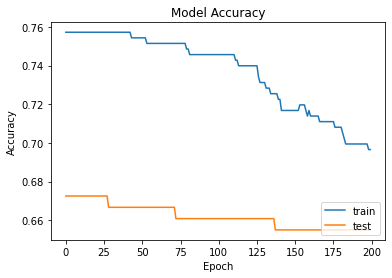

In [279]:
plt.plot(fit_model2.history['accuracy'])
plt.plot(fit_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

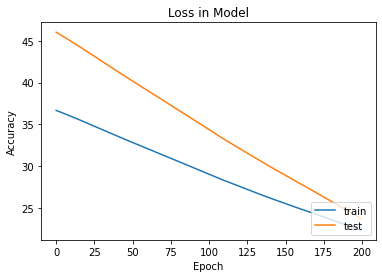

In [280]:
# summarizaion of history for loss
plt.plot(fit_model2.history['loss'])
plt.plot(fit_model2.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Here In this Graphs Test Line Completely OverLap On The Train Line,its Look Like Similar

# Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [281]:
# Fix Random Seed For Reproducibility

seed3 = 10
np.random.seed(seed3)

In [282]:
# creating model with ["sigmoid" and "logistic"]
model3 = Sequential() # 0 level
model3.add(Dense(14, input_dim=9,  activation='relu')) # FIRST LAYER
model3.add(Dense(9,  activation='sigmoid')) #2nd layer
model3.add(Dense(1, activation='tanh')) #3rd layer or op layer

In [283]:
# Compile Model
# Changing optimizer older=adadelta/ada, new=adagrad
model3.compile(loss='binary_crossentropy', optimizer='adagrad',metrics=['accuracy'])

In [284]:
# Fit The Model 
# Change epohcs
fit_model3=model3.fit(X,Y, validation_split=0.33, epochs=300, batch_size=15)

Epoch 1/300
24/24 [==============================] - 2s 28ms/step - loss: 0.6514 - accuracy: 0.7601 - val_loss: 0.6531 - val_accuracy: 0.6842
Epoch 2/300
24/24 [==============================] - 0s 6ms/step - loss: 0.6394 - accuracy: 0.7601 - val_loss: 0.6601 - val_accuracy: 0.6842
Epoch 3/300
24/24 [==============================] - 0s 7ms/step - loss: 0.6316 - accuracy: 0.7601 - val_loss: 0.6648 - val_accuracy: 0.6842
Epoch 4/300
24/24 [==============================] - 0s 7ms/step - loss: 0.6261 - accuracy: 0.7601 - val_loss: 0.6678 - val_accuracy: 0.6842
Epoch 5/300
24/24 [==============================] - 0s 7ms/step - loss: 0.6223 - accuracy: 0.7601 - val_loss: 0.6697 - val_accuracy: 0.6842
Epoch 6/300
24/24 [==============================] - 0s 7ms/step - loss: 0.6187 - accuracy: 0.7601 - val_loss: 0.6711 - val_accuracy: 0.6842
Epoch 7/300
24/24 [==============================] - 0s 6ms/step - loss: 0.6158 - accuracy: 0.7601 - val_loss: 0.6721 - val_accuracy: 0.6842
Epoch 8/300


Epoch 59/300
24/24 [==============================] - 0s 11ms/step - loss: 0.5728 - accuracy: 0.7572 - val_loss: 0.6961 - val_accuracy: 0.6784
Epoch 60/300
24/24 [==============================] - 0s 11ms/step - loss: 0.5727 - accuracy: 0.7572 - val_loss: 0.6965 - val_accuracy: 0.6784
Epoch 61/300
24/24 [==============================] - 0s 10ms/step - loss: 0.5726 - accuracy: 0.7572 - val_loss: 0.6968 - val_accuracy: 0.6784
Epoch 62/300
24/24 [==============================] - 0s 11ms/step - loss: 0.5726 - accuracy: 0.7572 - val_loss: 0.6970 - val_accuracy: 0.6784
Epoch 63/300
24/24 [==============================] - 0s 11ms/step - loss: 0.5724 - accuracy: 0.7572 - val_loss: 0.6972 - val_accuracy: 0.6784
Epoch 64/300
24/24 [==============================] - 0s 5ms/step - loss: 0.5724 - accuracy: 0.7572 - val_loss: 0.6975 - val_accuracy: 0.6784
Epoch 65/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5723 - accuracy: 0.7572 - val_loss: 0.6954 - val_accuracy: 0.6784
E

24/24 [==============================] - 0s 7ms/step - loss: 0.5692 - accuracy: 0.7572 - val_loss: 0.7050 - val_accuracy: 0.6784
Epoch 117/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5692 - accuracy: 0.7572 - val_loss: 0.7051 - val_accuracy: 0.6784
Epoch 118/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5692 - accuracy: 0.7572 - val_loss: 0.7050 - val_accuracy: 0.6784
Epoch 119/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5693 - accuracy: 0.7572 - val_loss: 0.7057 - val_accuracy: 0.6784
Epoch 120/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5692 - accuracy: 0.7572 - val_loss: 0.7056 - val_accuracy: 0.6784
Epoch 121/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5692 - accuracy: 0.7572 - val_loss: 0.7057 - val_accuracy: 0.6784
Epoch 122/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5692 - accuracy: 0.7572 - val_loss: 0.7057 - val_accuracy: 0.6784
Epoch 123/300

24/24 [==============================] - 0s 7ms/step - loss: 0.5681 - accuracy: 0.7572 - val_loss: 0.7077 - val_accuracy: 0.6784
Epoch 174/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5681 - accuracy: 0.7572 - val_loss: 0.7076 - val_accuracy: 0.6784
Epoch 175/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5681 - accuracy: 0.7572 - val_loss: 0.7074 - val_accuracy: 0.6784
Epoch 176/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5681 - accuracy: 0.7572 - val_loss: 0.7073 - val_accuracy: 0.6784
Epoch 177/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5681 - accuracy: 0.7572 - val_loss: 0.7073 - val_accuracy: 0.6784
Epoch 178/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.7572 - val_loss: 0.7072 - val_accuracy: 0.6784
Epoch 179/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5681 - accuracy: 0.7572 - val_loss: 0.7071 - val_accuracy: 0.6784
Epoch 180/300

24/24 [==============================] - 0s 6ms/step - loss: 0.5674 - accuracy: 0.7572 - val_loss: 0.7079 - val_accuracy: 0.6784
Epoch 231/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5673 - accuracy: 0.7572 - val_loss: 0.7079 - val_accuracy: 0.6784
Epoch 232/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5674 - accuracy: 0.7572 - val_loss: 0.7081 - val_accuracy: 0.6784
Epoch 233/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5673 - accuracy: 0.7572 - val_loss: 0.7081 - val_accuracy: 0.6784
Epoch 234/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5673 - accuracy: 0.7572 - val_loss: 0.7082 - val_accuracy: 0.6784
Epoch 235/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5673 - accuracy: 0.7572 - val_loss: 0.7082 - val_accuracy: 0.6784
Epoch 236/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5672 - accuracy: 0.7572 - val_loss: 0.7083 - val_accuracy: 0.6784
Epoch 237/300

24/24 [==============================] - 0s 7ms/step - loss: 0.5666 - accuracy: 0.7572 - val_loss: 0.7077 - val_accuracy: 0.6784
Epoch 288/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5666 - accuracy: 0.7572 - val_loss: 0.7077 - val_accuracy: 0.6784
Epoch 289/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5666 - accuracy: 0.7572 - val_loss: 0.7076 - val_accuracy: 0.6784
Epoch 290/300
24/24 [==============================] - 0s 8ms/step - loss: 0.5666 - accuracy: 0.7572 - val_loss: 0.7075 - val_accuracy: 0.6784
Epoch 291/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5666 - accuracy: 0.7572 - val_loss: 0.7075 - val_accuracy: 0.6784
Epoch 292/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5666 - accuracy: 0.7572 - val_loss: 0.7074 - val_accuracy: 0.6784
Epoch 293/300
24/24 [==============================] - 0s 9ms/step - loss: 0.5666 - accuracy: 0.7572 - val_loss: 0.7074 - val_accuracy: 0.6784
Epoch 294/300

In [285]:
# Evaluating the Model
score3 = model3.evaluate(X,Y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.6129 - accuracy: 0.7311
accuracy: 73.11%


In [286]:
# Visualzation of Training History, metric name and score
model3.metrics_names, score3 , fit_model3.history.keys()

(['loss', 'accuracy'],
 [0.6129240989685059, 0.731141209602356],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

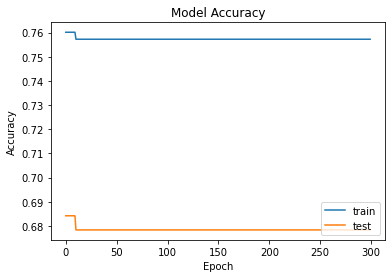

In [287]:
# Summarization Of History For Accuracy
plt.plot(fit_model3.history['accuracy'])
plt.plot(fit_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='lower right')
plt.show()

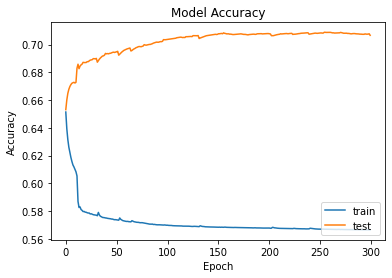

In [288]:
# summarizaion of history for loss
plt.plot(fit_model3.history['loss'])
plt.plot(fit_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Here in this graphs Test line almost overlap on tha Train line, it's look like similar.

# AS per calcluation "relu" activation function helping to increase accuracy
---------------------------------------------------------------------------------------------------------------
# Decision Tree

Model Building , Training and Testing

In [289]:
ffire['size_category'].unique()

array([1, 0])

In [290]:
x = ffire.iloc[:,2:-1]
y = ffire.iloc[:,-1]
print(y)
x

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32


FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..    ...    ...    ...   ...   ...  ..   ...   ...    ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 9 columns]

In [291]:
# Splitting The Data Into The Training And Testing Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

# Building Decision Tree Classifier Using Entropy Criteria

In [292]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

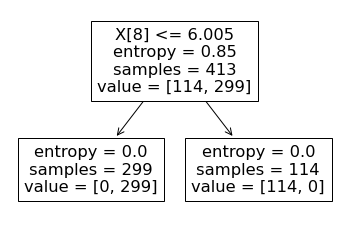

In [293]:
#Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [294]:
y_train.value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [295]:
ffire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [296]:
ffire['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

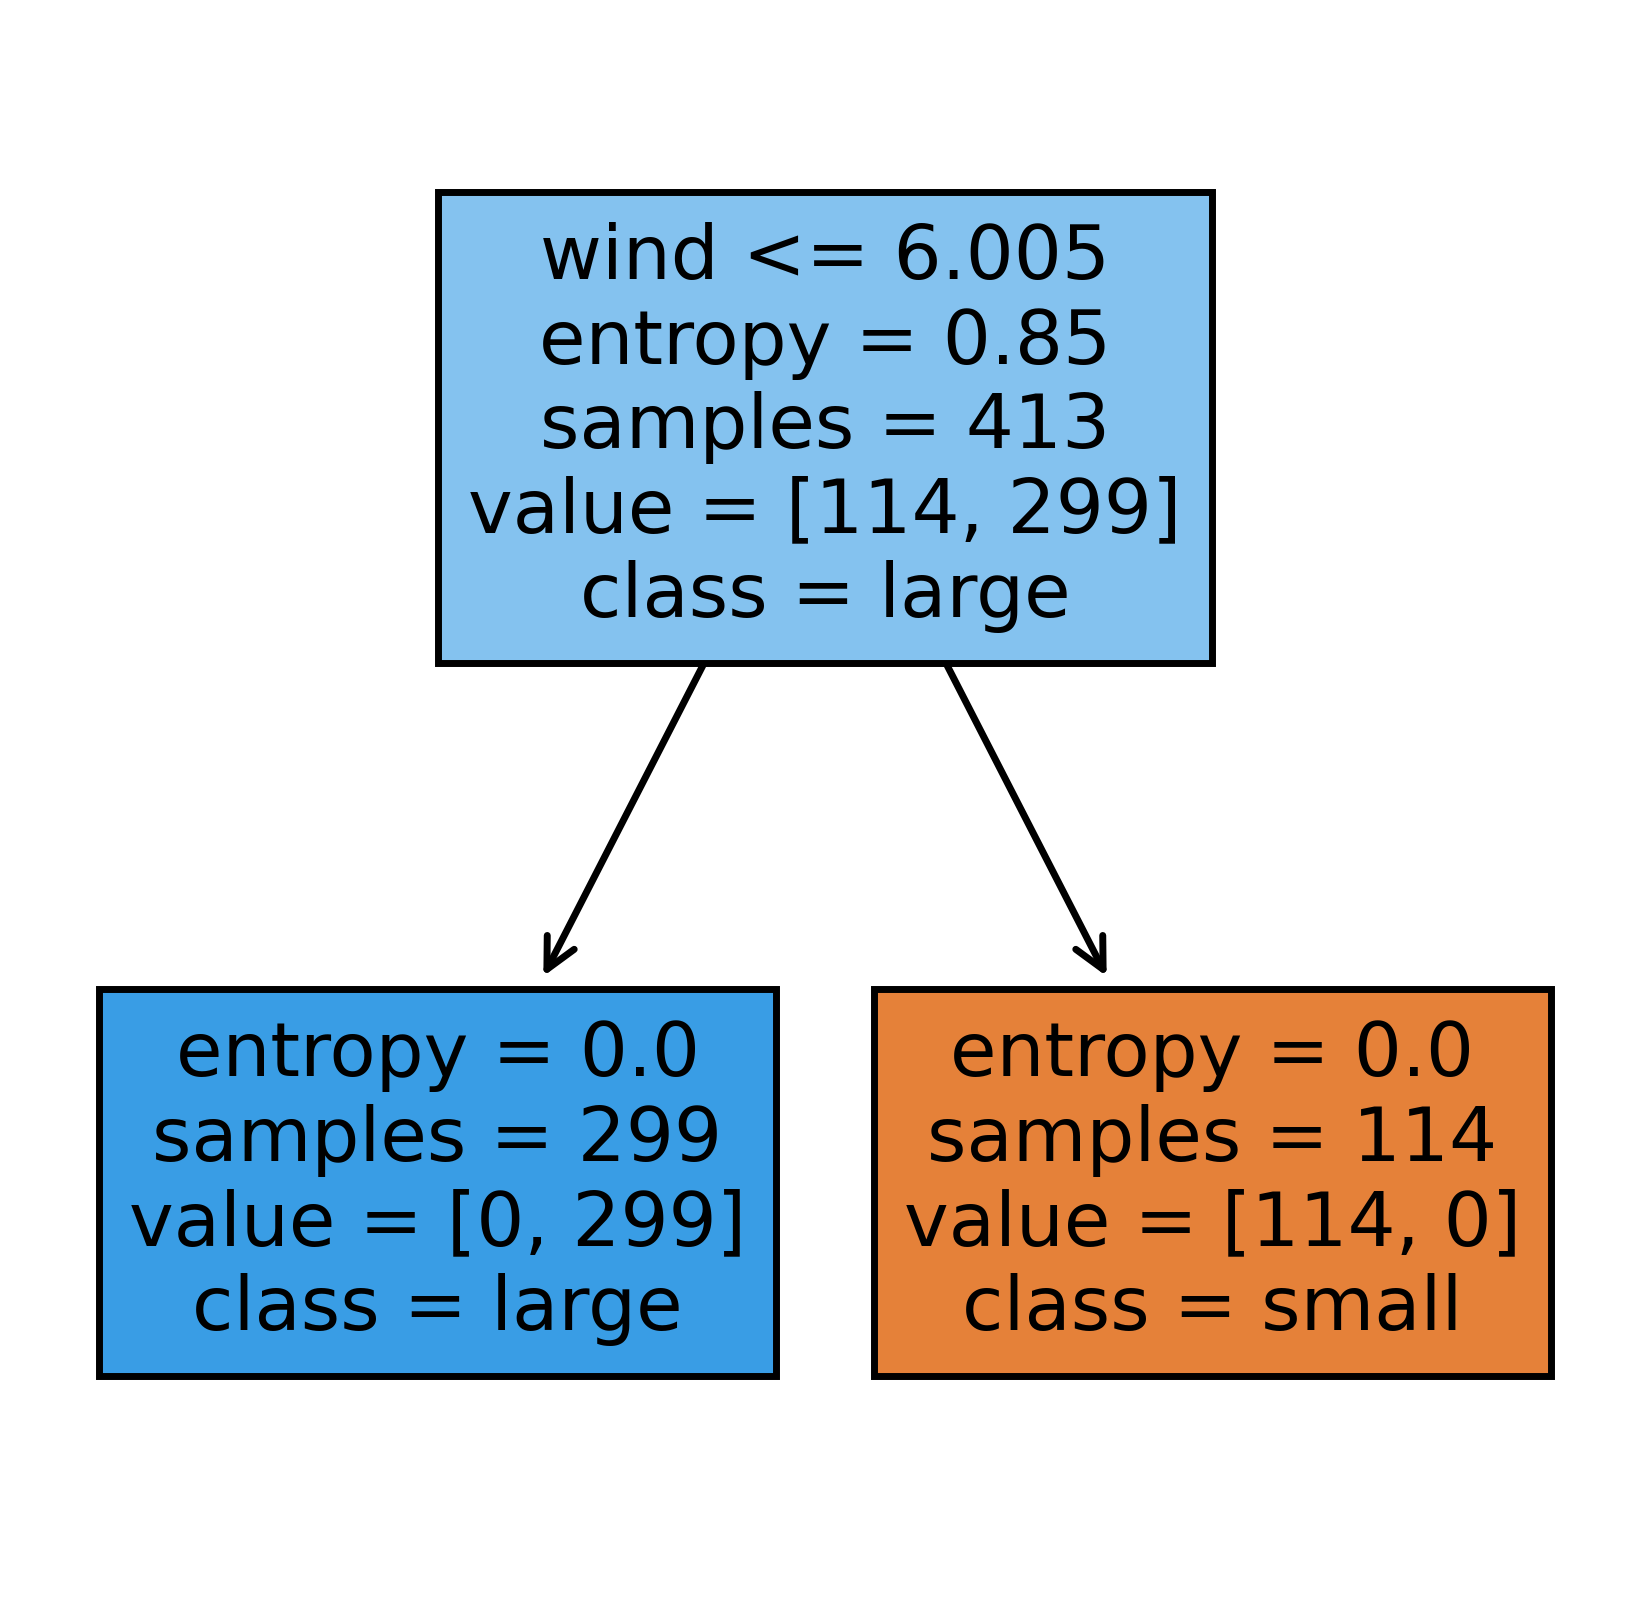

In [297]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']
cn = ['small', 'large']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [298]:
# Predicting On Test Data

preds = model.predict(x_test)     #Predicting On Test Data Set
pd.Series(preds).value_counts()   #Getting the Count Of Each Category

1    79
0    25
dtype: int64

In [299]:
y_test.value_counts()

1    79
0    25
Name: size_category, dtype: int64

In [300]:
preds

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [301]:
pd.crosstab(y_test, preds) 

col_0           0   1
size_category        
0              25   0
1               0  79

In [302]:
preds, y_test

(array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]),
 429    1
 48     1
 321    0
 332    0
 380    0
       ..
 335    1
 82     1
 18     1
 169    1
 507    1
 Name: size_category, Length: 104, dtype: int32)

In [303]:
#Accuracy
from sklearn.metrics import accuracy_score
import numpy as np

np.mean(preds == y_test), accuracy_score(y_test, preds)

(1.0, 1.0)

# Building Decision Tree Classifier (CART) Using Gini Criteria

In [304]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth =3)

In [305]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [306]:
# Prediction and Computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

1.0

# Decision Tree Regression Example

In [307]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [308]:
array = ffire.values
X = array[:,:-1]
Y = array[:,-1]
print(X)
print(Y)

[[ 7.    0.   86.2  ...  6.7   0.    0.  ]
 [10.    5.   90.6  ...  0.9   0.    0.  ]
 [10.    2.   90.6  ...  1.3   0.    0.  ]
 ...
 [ 1.    3.   81.6  ...  6.7   0.   11.16]
 [ 1.    2.   94.4  ...  4.    0.    0.  ]
 [ 9.    5.   79.5  ...  4.5   0.    0.  ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1.

In [309]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [310]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [311]:
# Now To Find The Accuracy
model.score(X_test, Y_test)

1.0

# Logistic Regression

In [312]:
from sklearn.linear_model import LogisticRegression
import pickle

In [313]:
# We Have Already Divided The Dataset Into Input and Output(I.E. model Building is Done)
# Model Fittig

classifier = LogisticRegression()
classifier.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [314]:
# Now To Save The Model To The Disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [315]:
# Now To Predict the X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [316]:
y_pred_ffire = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})

In [317]:
y_pred_ffire

actual  predicted_prob
0       1.0             1.0
1       1.0             1.0
2       1.0             1.0
3       1.0             1.0
4       1.0             1.0
..      ...             ...
512     0.0             0.0
513     0.0             0.0
514     0.0             0.0
515     1.0             1.0
516     1.0             1.0

[517 rows x 2 columns]

In [318]:
# Confusion Matrix For The Model Accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[138   1]
 [  0 378]]


In [319]:
((138+378)/(138+1+0+378))*100

99.80657640232108

In [320]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       139
         1.0       1.00      1.00      1.00       378

    accuracy                           1.00       517
   macro avg       1.00      1.00      1.00       517
weighted avg       1.00      1.00      1.00       517



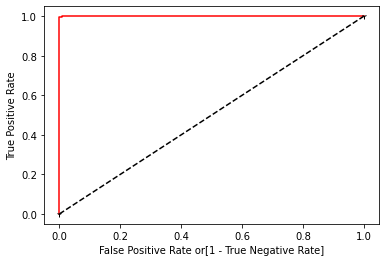

In [321]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or[1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [322]:
auc*100

99.64028776978418

# KNN Classification

In [323]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [324]:
kfold = KFold(n_splits = 10)

In [325]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is: ", results.mean()*100)

[0.98076923 0.98076923 0.98076923 0.5        0.63461538 0.69230769
 0.78846154 0.64705882 0.7254902  0.70588235]
Accuracy is:  76.36123680241327


In [326]:
# Grid Search For Algorithm Tuning

from sklearn.model_selection import GridSearchCV
import numpy as np
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [327]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [328]:
print(grid.best_score_)

0.7620799103808813


# SVC

In [329]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [330]:
# Take The Sample Of The Data For Training & Testing

array = ffire.values
X = array[:,2:-1]
Y = array[:,-1]
print(X)
print(Y)

[[ 86.2   26.2   94.3  ...   6.7    0.     0.  ]
 [ 90.6   35.4  669.1  ...   0.9    0.     0.  ]
 [ 90.6   43.7  686.9  ...   1.3    0.     0.  ]
 ...
 [ 81.6   56.7  665.6  ...   6.7    0.    11.16]
 [ 94.4  146.   614.7  ...   4.     0.     0.  ]
 [ 79.5    3.   106.7  ...   4.5    0.     0.  ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [331]:
ffire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int32  
dtypes: float64(8), int32(3), int64(1)
memory usage: 42.5 KB


In [332]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Creating training and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [333]:
# Training a SVM classifier using SVC class
svm = SVC(kernel = 'linear', random_state = 1, C = 0.1)
svm.fit(X_train_std, Y_train)

SVC(C=0.1, kernel='linear', random_state=1)

# Accuracy is very small so we predict model using SVM.


# SVM

In [334]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [335]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [336]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((413, 9), (104, 9), (413,), (104,))

1) Grid Search CV

In [337]:
SVMC = SVC(random_state = 42)
svc_param_grid = {'kernel' : ['rbf', 'sigmoid', 'poly', 'linear'], 'gamma': [1,0.1,0.01,0.001], 'C': [1000,100,10,1], 'tol': [0.001,0.0008,0.0009,0.0011]}
gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(X_train, Y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


0.9861861861861861

In [338]:

clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma': [0.5,0.1,0.1], 'C': [10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(X_train, Y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.973 total time=   1.2s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

[CV 3/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 4/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 5/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 6/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 6/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 7/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 7/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 8/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 8/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 9/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 9/10; 6/24] END C=10, ga

[CV 9/10; 11/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 10/10; 11/24] START C=0.1, gamma=0.1, kernel=linear.........................
[CV 10/10; 11/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 1/10; 12/24] START C=0.1, gamma=0.1, kernel=rbf.............................
[CV 1/10; 12/24] END C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 2/10; 12/24] START C=0.1, gamma=0.1, kernel=rbf.............................
[CV 2/10; 12/24] END C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/10; 12/24] START C=0.1, gamma=0.1, kernel=rbf.............................
[CV 3/10; 12/24] END C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/10; 12/24] START C=0.1, gamma=0.1, kernel=rbf.............................
[CV 4/10; 12/24] END C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/10; 12/24] START C=0.1, gamma=0.1, kernel=rbf.............................
[CV 5/10;

[CV 7/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 8/10; 17/24] START C=0.001, gamma=0.1, kernel=linear........................
[CV 8/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 9/10; 17/24] START C=0.001, gamma=0.1, kernel=linear........................
[CV 9/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 10/10; 17/24] START C=0.001, gamma=0.1, kernel=linear.......................
[CV 10/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=0.889 total time=   0.0s
[CV 1/10; 18/24] START C=0.001, gamma=0.1, kernel=rbf...........................
[CV 1/10; 18/24] END C=0.001, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 2/10; 18/24] START C=0.001, gamma=0.1, kernel=rbf...........................
[CV 2/10; 18/24] END C=0.001, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/10; 18/24] START C=0.001, gamma=0.1, kernel=rbf...................

[CV 2/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.944 total time=   0.0s
[CV 3/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 3/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 4/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 4/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.806 total time=   0.0s
[CV 5/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 5/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 6/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 6/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.861 total time=   0.0s
[CV 7/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 7/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.889 total time=   0.0s
[CV 8/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear....

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=30)

In [339]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'linear'}, 0.9861861861861861)

In [340]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy is: ", acc)
confusion_matrix(Y_test, y_pred)

Accuracy is:  99.35897435897436


array([[ 45,   1],
       [  0, 110]], dtype=int64)

In [341]:
((45+110)/(45+0+1+110))*100

99.35897435897436

# Neural_Networks_ (Gas_Turbines)

# The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean Ambient temperature (AT) C â€“6.23 37.10 17.71 Ambient pressure (AP) mbar 985.85 1036.56 1013.07 Ambient humidity (AH) (%) 24.08 100.20 77.87 Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93 Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56 Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43 Turbine after temperature (TAT) C 511.04 550.61 546.16 Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06 Turbine energy yield (TEY) MWH 100.02 179.50 133.51 Carbon monoxide (CO) mg/m3 0.00 44.10 2.37 Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [342]:
import pandas as pd
import numpy as np

In [343]:
gast = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\gas_turbines.csv")
gast.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

# EDA

In [344]:
gast.shape

(15039, 11)

In [345]:
gast.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [346]:
gast.index

RangeIndex(start=0, stop=15039, step=1)

In [347]:
gast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [348]:
gast.describe().T

count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

In [349]:
gast.isna().sum() # Checking Null Values, There Is No Null Values Present In Given data Set

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [350]:
gast['TEY'].unique()

array([114.7 , 114.72, 114.71, ..., 123.78, 121.26, 115.52])

In [351]:
gast['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [352]:
print("Mean of Turbine Energy Yield is: ", gast['TEY'].mean())
print("Median of Turbine Energy Yield is: ", gast['TEY'].median())

Mean of Turbine Energy Yield is:  134.18846399361655
Median of Turbine Energy Yield is:  133.78


In [353]:
# Divide/spilt TEY Columns Values Into Two Groups Using Median

tey = []
for i in gast['TEY']:
    if i>=133.78:
        tey.append(1)
    else:
        tey.append(0)
gast['tey'] = tey

In [354]:
gast.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  tey  
0  3.1547  82.722    0  
1  3.2363  82.776    0  
2  3.2012  82.468    0  
3  3.1923  82.670    0  
4  3.2484  82.311    0

In [355]:
# Drop column
gast.drop('TEY', axis = 1, inplace = True)
gast.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX',
       'tey'],
      dtype='object')

In [356]:
# Rename Column
gast.rename({'tey': 'TEY'}, axis = 1, inplace = True)

In [357]:
gast.columns # Check Column Names

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX',
       'TEY'],
      dtype='object')

In [358]:
gast['TEY'].value_counts()

1    7658
0    7381
Name: TEY, dtype: int64

In [359]:
gast[gast.duplicated()]    # In this dataset no duplicate values

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, CDP, CO, NOX, TEY]
Index: []

In [360]:
gast.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   
TEY  -0.049689  0.067726 -0.135535  0.490736  0.697080  0.667879 -0.461348   

           CDP        CO       NOX       TEY  
AT   -0.100705 -0.088588 -0.600006 -0.049689  
AP    0.131198  0.041614  0.256744  0.067726  
AH   -0.182010  0.165505  0.143061 -0.135535  
AFDP  0.727152 -0.334207 -0.037299  0.490736  
GTEP  0.993784 -0.508259 -0.208496  0.697080  
TIT   0.887238 -0.688272 -0.231636  0.667879  
TAT  -0.744740  0.063404  0.009888 -0.461348  
CDP   1.000000 -0.520783 -0.169103  0.705370  
CO   -0.520783  1.000000  0.316743 -0.386192  
NOX  -0.169103  0.316743  1.000000 -0.079604  
TEY   0.705370 -0.386192 -0.079604  1.000000

# Visualization

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns

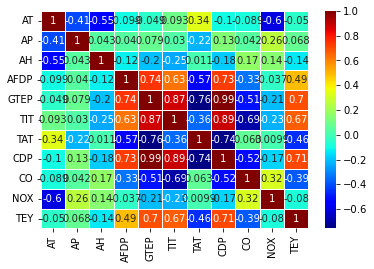

In [362]:
sns.heatmap(gast.corr(), cmap = "jet", annot = True, linewidth = 1)
plt.show()

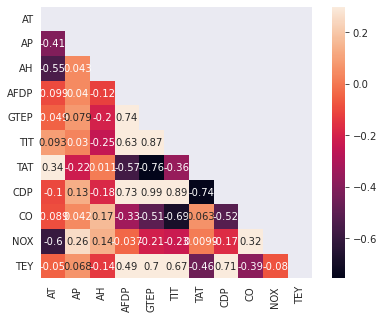

In [363]:
corr = gast.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):  # Style must be: white, whitegrid, dark, darkgrid.
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr,mask=mask, vmax=.3, square=True, annot = True)

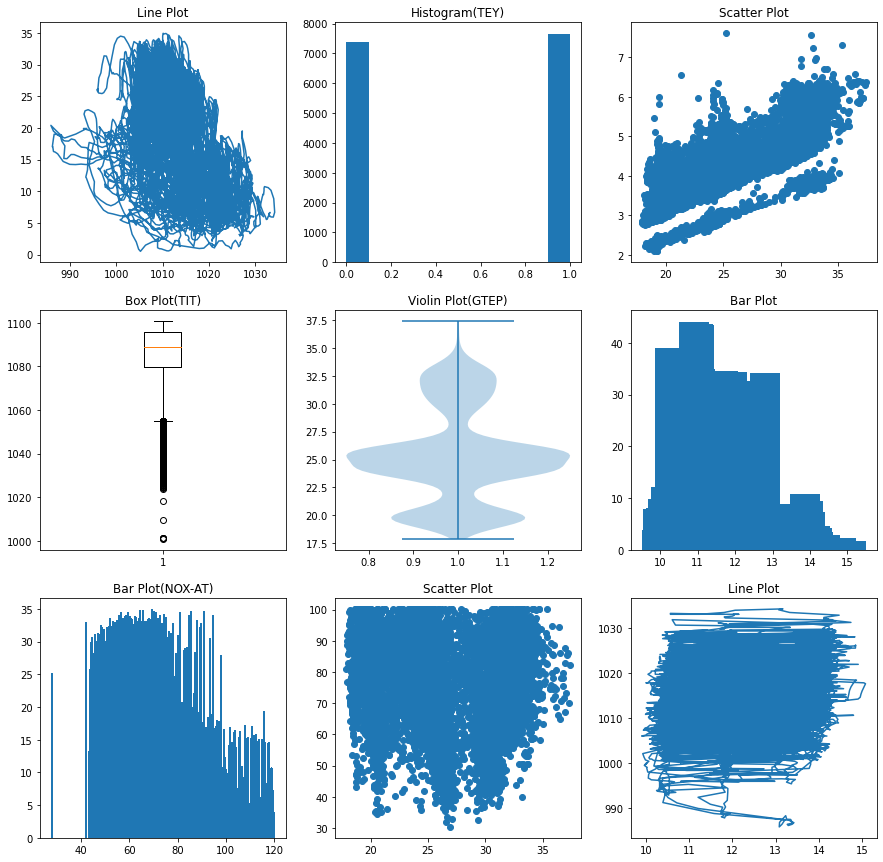

In [364]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize =(15,15))
ax[0,0].plot('AP','AT', data = gast);ax[0,0].set_title("Line Plot")
ax[0,1].hist('TEY', data = gast);ax[0,1].set_title("Histogram(TEY)")
ax[0,2].scatter('GTEP', 'AFDP', data = gast);ax[0,2].set_title("Scatter Plot")
ax[1,0].boxplot('TIT', data = gast);ax[1,0].set_title("Box Plot(TIT)")
ax[1,1].violinplot('GTEP', data = gast);ax[1,1].set_title("Violin Plot(GTEP)")
ax[1,2].bar('CDP','CO', data = gast);ax[1,2].set_title("Bar Plot")
ax[2,0].bar(gast['NOX'], gast["AT"]);ax[2,0].set_title("Bar Plot(NOX-AT)")
ax[2,1].scatter('GTEP','AH', data = gast);ax[2,1].set_title("Scatter Plot")
ax[2,2].plot('CDP','AP', data = gast);ax[2,2].set_title("Line Plot")
plt.show()

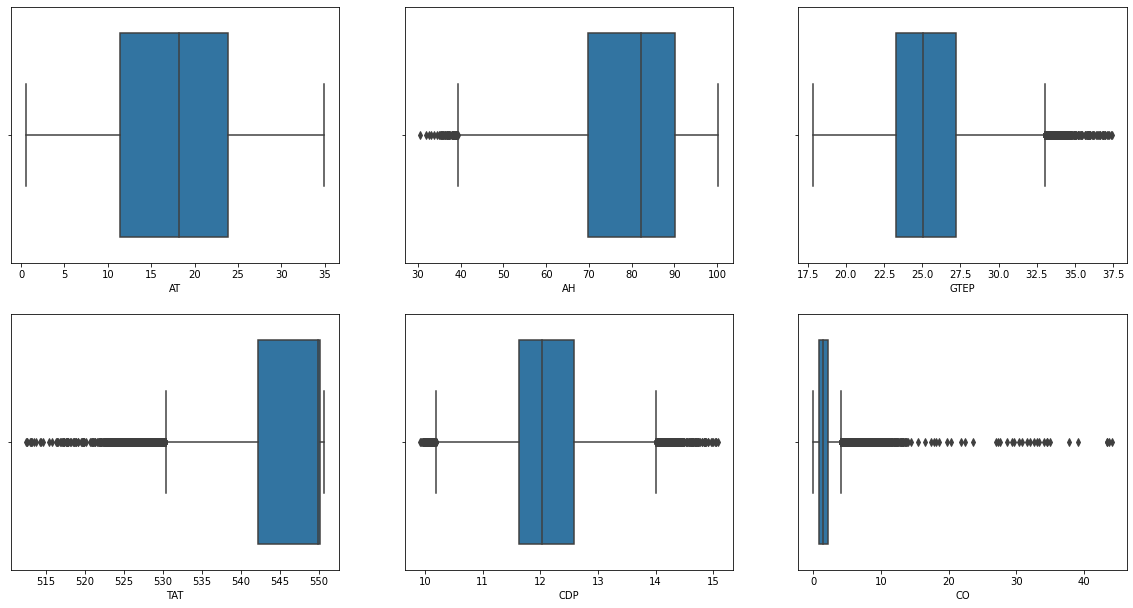

In [365]:
plt.subplots(figsize=(20,16))
# [plt.subplot(3,3,1), sns.countplot(data=gast, y='CDP')];

# [plt.subplot(3,3,2), sns.countplot(data=gast, y='CO')];

[plt.subplot(3,3,1), sns.boxplot(x=gast["AT"])];

[plt.subplot(3,3,2), sns.boxplot(x=gast["AH"])];

[plt.subplot(3,3,3), sns.boxplot(x=gast["GTEP"])];

[plt.subplot(3,3,4), sns.boxplot(x=gast["TAT"])];

[plt.subplot(3,3,5), sns.boxplot(x=gast["CDP"])];

[plt.subplot(3,3,6), sns.boxplot(x=gast["CO"])];

# [plt.subplot(3,3,9), sns.boxplot(x=gast["NOX"])]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


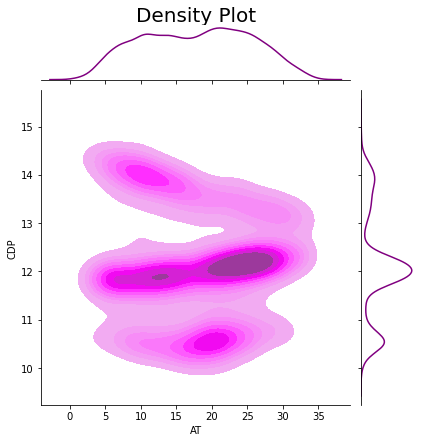

In [366]:
sns.jointplot(x = 'AT', y='CDP', data = gast, kind= 'kde', shade = True, color = 'purple')  # shade = True: filed with color shape
plt.title("Density Plot", size = 20, y= 1.2)
plt.show()

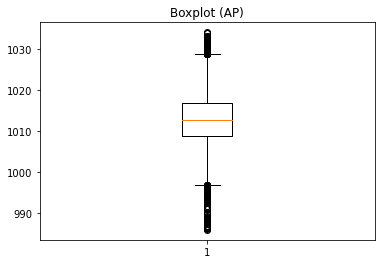

In [367]:
# Boxplot For Outlier Detection
plt.boxplot(gast['AP']); plt.title("Boxplot (AP)")
plt.show()

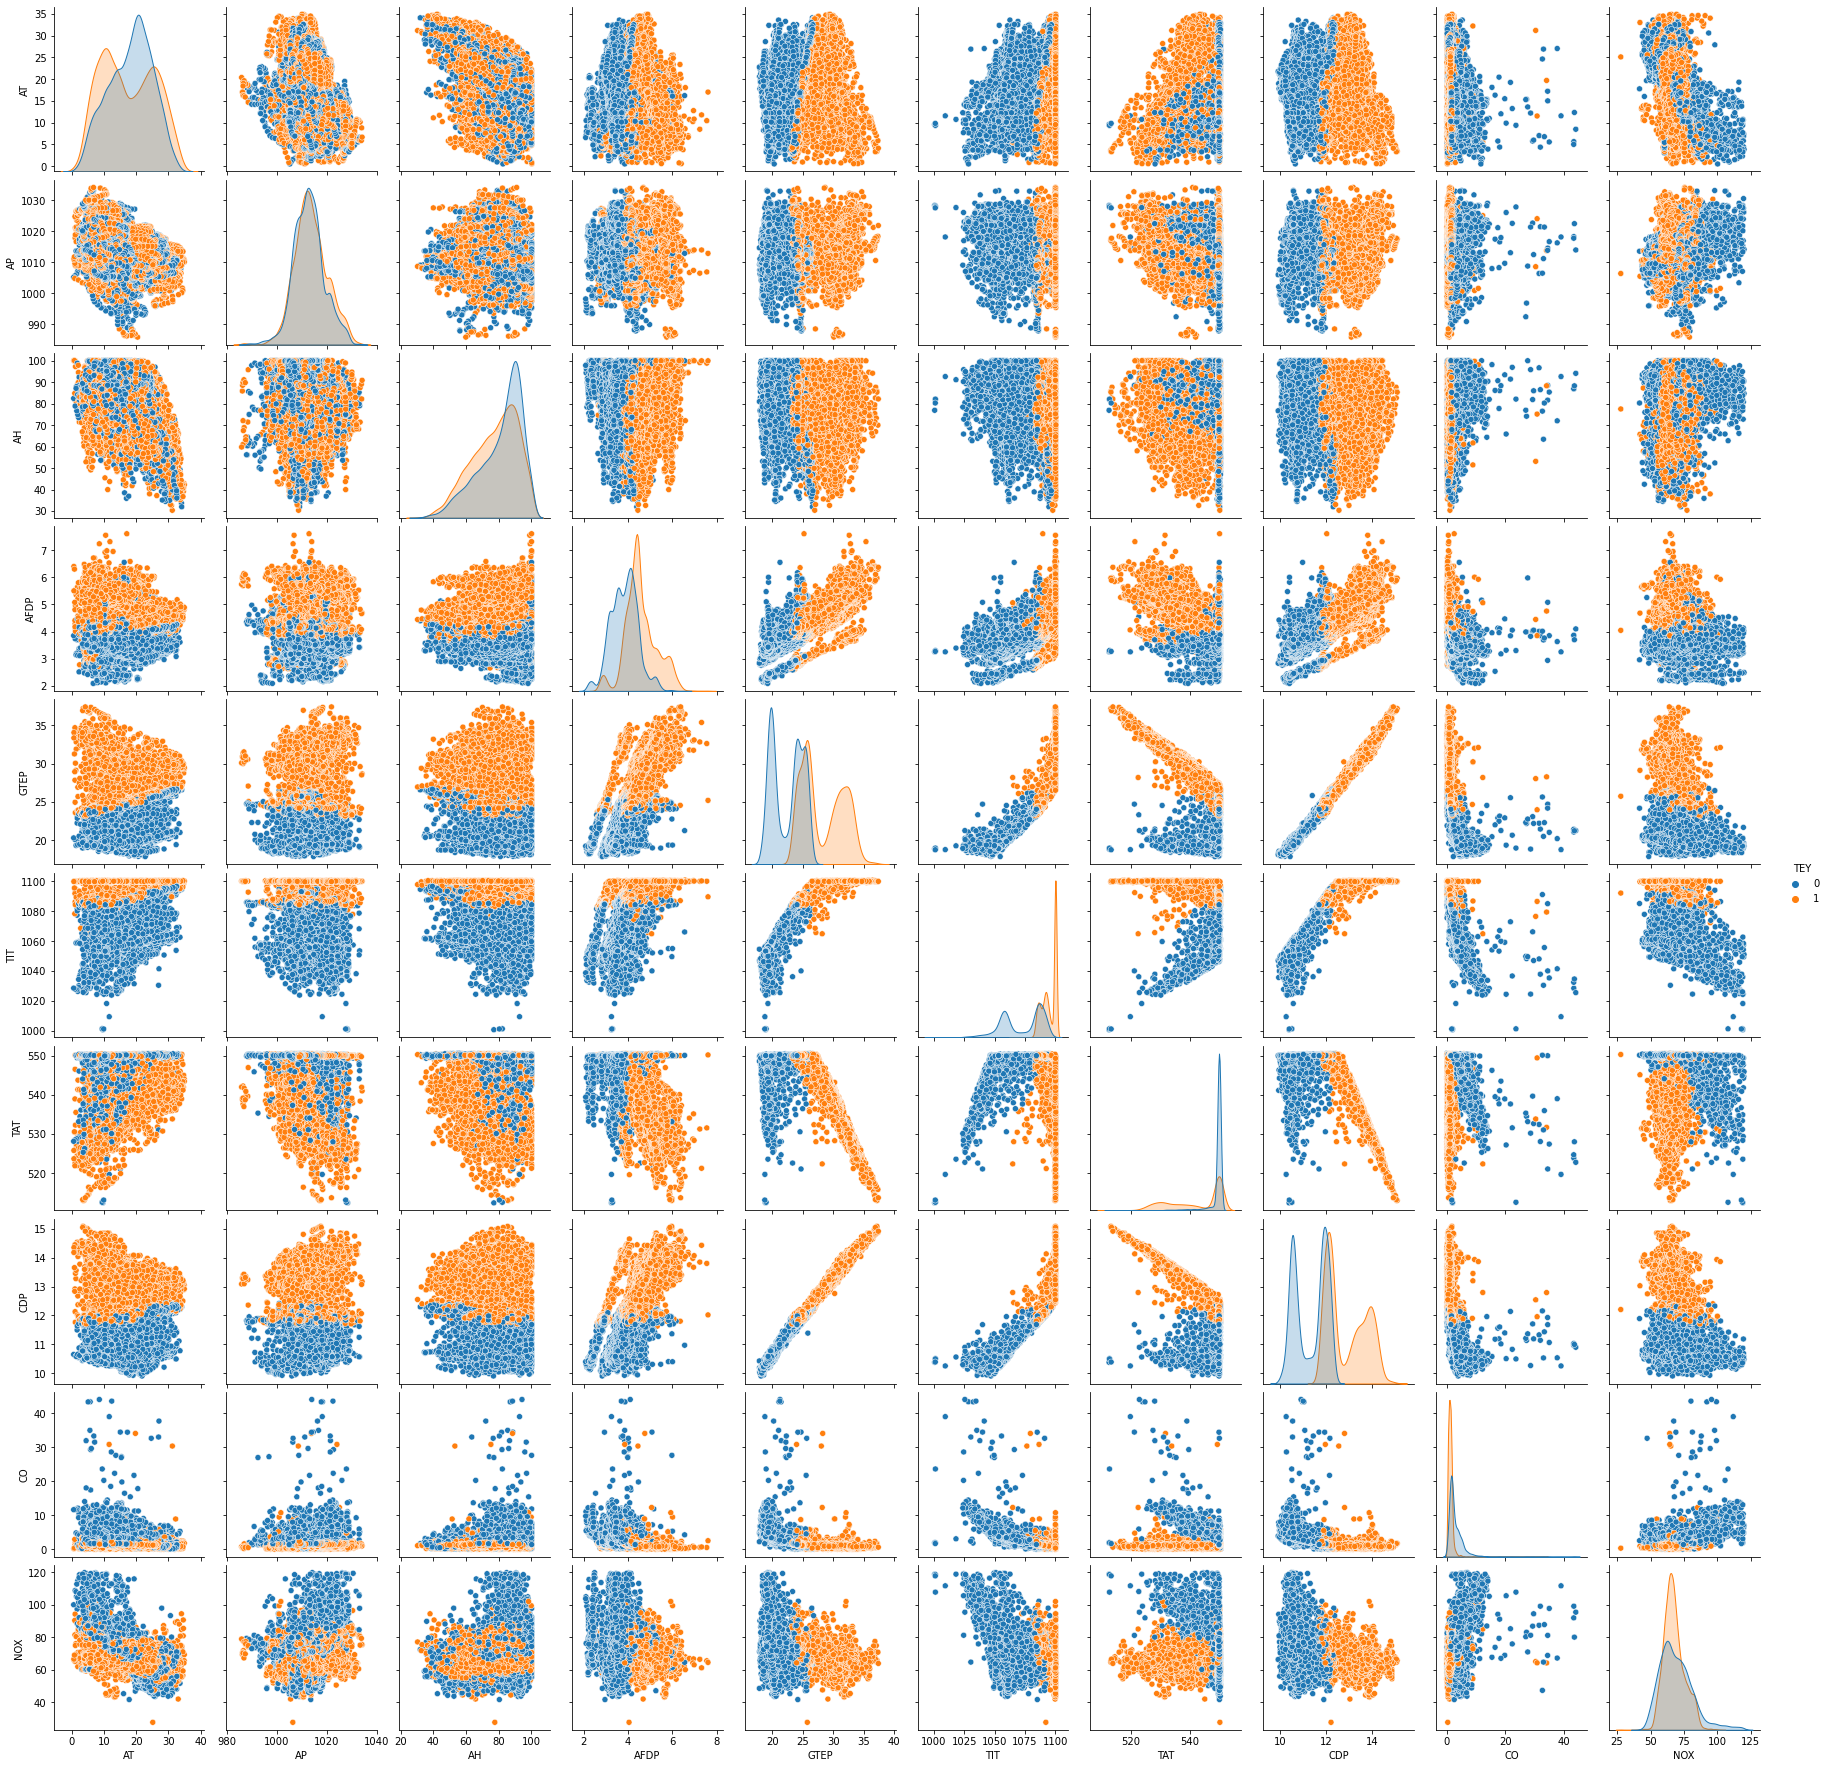

In [368]:
# Plotting pairplot for visualize all the attributes in one plot
sns.pairplot(gast, hue = 'TEY')
plt.show()

# Neural Network

In [369]:
from keras.models import Sequential
from keras.layers import Dense, LSTM # we can use LSTM Instead Of Dense
from sklearn import preprocessing

In [370]:
X , Y = gast.iloc[:,:-1], gast['TEY']
print(Y)
X

0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY, Length: 15039, dtype: int64


AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [371]:
# Architecture
model = Sequential()
model.add(Dense(12, input_dim = 10, activation = "relu", name = 'inpurt_layer_Dense'))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [372]:
# Compile Model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model

In [373]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inpurt_layer_Dense (Dense)  (None, 12)                132       
                                                                 
 dense_23 (Dense)            (None, 8)                 104       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [374]:
# Fit the model
fit_model = model.fit(X, Y, validation_split = 0.33, epochs = 250, batch_size = 10)

Epoch 1/250
1008/1008 [==============================] - 7s 4ms/step - loss: 6.1392 - accuracy: 0.6206 - val_loss: 0.5352 - val_accuracy: 0.7510
Epoch 2/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.5387 - accuracy: 0.7344 - val_loss: 0.4617 - val_accuracy: 0.7778
Epoch 3/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.4798 - accuracy: 0.7534 - val_loss: 0.4033 - val_accuracy: 0.7977
Epoch 4/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.4452 - accuracy: 0.7617 - val_loss: 0.3743 - val_accuracy: 0.8066
Epoch 5/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.4204 - accuracy: 0.7706 - val_loss: 0.4082 - val_accuracy: 0.7890
Epoch 6/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.4073 - accuracy: 0.7701 - val_loss: 0.3442 - val_accuracy: 0.8183
Epoch 7/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3993 - accuracy: 0.7757 - val_loss: 0.3423 - val_ac

1008/1008 [==============================] - 4s 4ms/step - loss: 0.3606 - accuracy: 0.7925 - val_loss: 0.3372 - val_accuracy: 0.8046
Epoch 58/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3596 - accuracy: 0.7901 - val_loss: 0.2930 - val_accuracy: 0.8269
Epoch 59/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3566 - accuracy: 0.7928 - val_loss: 0.2890 - val_accuracy: 0.8380
Epoch 60/250
1008/1008 [==============================] - 5s 4ms/step - loss: 0.3631 - accuracy: 0.7870 - val_loss: 0.2889 - val_accuracy: 0.8281
Epoch 61/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3571 - accuracy: 0.7917 - val_loss: 0.2868 - val_accuracy: 0.8338
Epoch 62/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3551 - accuracy: 0.7965 - val_loss: 0.3105 - val_accuracy: 0.8150
Epoch 63/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3544 - accuracy: 0.7935 - val_loss: 0.2860 - val_accuracy

1008/1008 [==============================] - 5s 5ms/step - loss: 0.3408 - accuracy: 0.8069 - val_loss: 0.2800 - val_accuracy: 0.8318
Epoch 114/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3379 - accuracy: 0.8080 - val_loss: 0.2733 - val_accuracy: 0.8412
Epoch 115/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3435 - accuracy: 0.8021 - val_loss: 0.2996 - val_accuracy: 0.8229
Epoch 116/250
1008/1008 [==============================] - 6s 6ms/step - loss: 0.3422 - accuracy: 0.8041 - val_loss: 0.2750 - val_accuracy: 0.8424
Epoch 117/250
1008/1008 [==============================] - 6s 6ms/step - loss: 0.3370 - accuracy: 0.8098 - val_loss: 0.2859 - val_accuracy: 0.8287
Epoch 118/250
1008/1008 [==============================] - 6s 6ms/step - loss: 0.3489 - accuracy: 0.7957 - val_loss: 0.2776 - val_accuracy: 0.8336
Epoch 119/250
1008/1008 [==============================] - 6s 6ms/step - loss: 0.3396 - accuracy: 0.8080 - val_loss: 0.2738 - val_ac

Epoch 169/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3305 - accuracy: 0.8123 - val_loss: 0.2688 - val_accuracy: 0.8465
Epoch 170/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3239 - accuracy: 0.8191 - val_loss: 0.2662 - val_accuracy: 0.8442
Epoch 171/250
1008/1008 [==============================] - 6s 6ms/step - loss: 0.3292 - accuracy: 0.8181 - val_loss: 0.2668 - val_accuracy: 0.8430
Epoch 172/250
1008/1008 [==============================] - 6s 6ms/step - loss: 0.3259 - accuracy: 0.8190 - val_loss: 0.2846 - val_accuracy: 0.8326
Epoch 173/250
1008/1008 [==============================] - 6s 6ms/step - loss: 0.3252 - accuracy: 0.8217 - val_loss: 0.2772 - val_accuracy: 0.8352
Epoch 174/250
1008/1008 [==============================] - 6s 6ms/step - loss: 0.3329 - accuracy: 0.8128 - val_loss: 0.2684 - val_accuracy: 0.8408
Epoch 175/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3285 - accuracy: 0.8188 - val_loss: 0

Epoch 225/250
1008/1008 [==============================] - 6s 6ms/step - loss: 0.3170 - accuracy: 0.8255 - val_loss: 0.2585 - val_accuracy: 0.8523
Epoch 226/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3170 - accuracy: 0.8226 - val_loss: 0.3072 - val_accuracy: 0.8219
Epoch 227/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3218 - accuracy: 0.8210 - val_loss: 0.2744 - val_accuracy: 0.8380
Epoch 228/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3213 - accuracy: 0.8224 - val_loss: 0.2577 - val_accuracy: 0.8539
Epoch 229/250
1008/1008 [==============================] - 6s 6ms/step - loss: 0.3208 - accuracy: 0.8247 - val_loss: 0.3124 - val_accuracy: 0.8126
Epoch 230/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3158 - accuracy: 0.8300 - val_loss: 0.2648 - val_accuracy: 0.8457
Epoch 231/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3183 - accuracy: 0.8239 - val_loss: 0

In [375]:
# Fit the model
fit_model = model.fit(X, Y, validation_split = 0.33, epochs = 250, batch_size = 10)

Epoch 1/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3267 - accuracy: 0.8193 - val_loss: 0.2564 - val_accuracy: 0.8535
Epoch 2/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3142 - accuracy: 0.8275 - val_loss: 0.3605 - val_accuracy: 0.7961
Epoch 3/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3178 - accuracy: 0.8269 - val_loss: 0.2557 - val_accuracy: 0.8547
Epoch 4/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3141 - accuracy: 0.8283 - val_loss: 0.2572 - val_accuracy: 0.8503
Epoch 5/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3132 - accuracy: 0.8263 - val_loss: 0.2599 - val_accuracy: 0.8503
Epoch 6/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3158 - accuracy: 0.8267 - val_loss: 0.3068 - val_accuracy: 0.8237
Epoch 7/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3123 - accuracy: 0.8285 - val_loss: 0.2578 - val_ac

1008/1008 [==============================] - 4s 4ms/step - loss: 0.3047 - accuracy: 0.8383 - val_loss: 0.2552 - val_accuracy: 0.8557
Epoch 58/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3120 - accuracy: 0.8295 - val_loss: 0.2481 - val_accuracy: 0.8618
Epoch 59/250
1008/1008 [==============================] - 6s 5ms/step - loss: 0.3040 - accuracy: 0.8387 - val_loss: 0.2476 - val_accuracy: 0.8608
Epoch 60/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3065 - accuracy: 0.8348 - val_loss: 0.2542 - val_accuracy: 0.8565
Epoch 61/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3089 - accuracy: 0.8306 - val_loss: 0.2491 - val_accuracy: 0.8614
Epoch 62/250
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3060 - accuracy: 0.8363 - val_loss: 0.2498 - val_accuracy: 0.8579
Epoch 63/250
1008/1008 [==============================] - 5s 5ms/step - loss: 0.3032 - accuracy: 0.8380 - val_loss: 0.2496 - val_accuracy

1008/1008 [==============================] - 1s 1ms/step - loss: 0.2948 - accuracy: 0.8433 - val_loss: 0.2662 - val_accuracy: 0.8503
Epoch 114/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2909 - accuracy: 0.8453 - val_loss: 0.2556 - val_accuracy: 0.8579
Epoch 115/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2992 - accuracy: 0.8375 - val_loss: 0.2426 - val_accuracy: 0.8660
Epoch 116/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.3019 - accuracy: 0.8382 - val_loss: 0.2699 - val_accuracy: 0.8404
Epoch 117/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2981 - accuracy: 0.8457 - val_loss: 0.3645 - val_accuracy: 0.8197
Epoch 118/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.3027 - accuracy: 0.8402 - val_loss: 0.2493 - val_accuracy: 0.8569
Epoch 119/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2971 - accuracy: 0.8452 - val_loss: 0.2771 - val_ac

Epoch 169/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2948 - accuracy: 0.8487 - val_loss: 0.4048 - val_accuracy: 0.7971
Epoch 170/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2942 - accuracy: 0.8435 - val_loss: 0.2724 - val_accuracy: 0.8449
Epoch 171/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2936 - accuracy: 0.8461 - val_loss: 0.2855 - val_accuracy: 0.8360
Epoch 172/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2959 - accuracy: 0.8433 - val_loss: 0.2760 - val_accuracy: 0.8402
Epoch 173/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.3008 - accuracy: 0.8408 - val_loss: 0.2617 - val_accuracy: 0.8507
Epoch 174/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2979 - accuracy: 0.8419 - val_loss: 0.2665 - val_accuracy: 0.8440
Epoch 175/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2910 - accuracy: 0.8452 - val_loss: 0

Epoch 225/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2941 - accuracy: 0.8427 - val_loss: 0.2916 - val_accuracy: 0.8354
Epoch 226/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2871 - accuracy: 0.8508 - val_loss: 0.2390 - val_accuracy: 0.8712
Epoch 227/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2914 - accuracy: 0.8476 - val_loss: 0.2567 - val_accuracy: 0.8571
Epoch 228/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2915 - accuracy: 0.8481 - val_loss: 0.2434 - val_accuracy: 0.8592
Epoch 229/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2954 - accuracy: 0.8436 - val_loss: 0.2379 - val_accuracy: 0.8676
Epoch 230/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2944 - accuracy: 0.8433 - val_loss: 0.2365 - val_accuracy: 0.8721
Epoch 231/250
1008/1008 [==============================] - 1s 1ms/step - loss: 0.2949 - accuracy: 0.8431 - val_loss: 0

In [376]:
# Evaluating the Model
score1 = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], score1[1]*100))

470/470 [==============================] - 0s 819us/step - loss: 0.2632 - accuracy: 0.8603
accuracy: 86.03%


# Accuracy = 77.94%

In [377]:
model.metrics_names

['loss', 'accuracy']

In [378]:
# Visulatization Of Training History 
fit_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [379]:
fit_model.history['accuracy']

[0.8192735314369202,
 0.8275108933448792,
 0.826915442943573,
 0.8283048868179321,
 0.8263199925422668,
 0.826716959476471,
 0.8285033702850342,
 0.8233426213264465,
 0.8295950889587402,
 0.8286026120185852,
 0.8291981220245361,
 0.8286026120185852,
 0.8216553926467896,
 0.8316792249679565,
 0.8300912976264954,
 0.8301905393600464,
 0.8319769501686096,
 0.8302897810935974,
 0.8319769501686096,
 0.8308852910995483,
 0.8264192342758179,
 0.827113926410675,
 0.8290988206863403,
 0.8332671523094177,
 0.8297935724258423,
 0.8336641788482666,
 0.8351528644561768,
 0.8313814997673035,
 0.8349543213844299,
 0.8311830163002014,
 0.8289995789527893,
 0.8301905393600464,
 0.8284041285514832,
 0.8258237242698669,
 0.836046040058136,
 0.8252282738685608,
 0.8310837745666504,
 0.8327709436416626,
 0.8320761919021606,
 0.8344581127166748,
 0.8417030572891235,
 0.8283048868179321,
 0.8297935724258423,
 0.8344581127166748,
 0.837038516998291,
 0.836046040058136,
 0.8333663940429688,
 0.8324732184410095

In [380]:
fit_model.history['val_accuracy']

[0.8535160422325134,
 0.7960910797119141,
 0.8547249436378479,
 0.8502921462059021,
 0.8502921462059021,
 0.8236953616142273,
 0.8535160422325134,
 0.8508966565132141,
 0.8541204929351807,
 0.8537175059318542,
 0.8533145189285278,
 0.8249042630195618,
 0.8512996435165405,
 0.8551279306411743,
 0.8523070812225342,
 0.8422325253486633,
 0.8498891592025757,
 0.8454563617706299,
 0.8575458526611328,
 0.8500906825065613,
 0.8539190292358398,
 0.8490832448005676,
 0.8557324409484863,
 0.8589562773704529,
 0.8559339046478271,
 0.8436429500579834,
 0.8599637150764465,
 0.8579488396644592,
 0.8553294539451599,
 0.8373967409133911,
 0.8420310020446777,
 0.8561354279518127,
 0.8390086889266968,
 0.8529115319252014,
 0.8208744525909424,
 0.826113224029541,
 0.8547249436378479,
 0.8307475447654724,
 0.8561354279518127,
 0.8571428656578064,
 0.8553294539451599,
 0.8581503033638,
 0.8587548136711121,
 0.8575458526611328,
 0.8529115319252014,
 0.8436429500579834,
 0.8444489240646362,
 0.79588955640792

In [381]:
fit_model.history['loss']

[0.3266686499118805,
 0.3142417073249817,
 0.3178112804889679,
 0.3141467273235321,
 0.3132123351097107,
 0.315773069858551,
 0.3123266100883484,
 0.31786760687828064,
 0.31432679295539856,
 0.3077450096607208,
 0.3112574815750122,
 0.3121159076690674,
 0.32334402203559875,
 0.3084653913974762,
 0.3094114065170288,
 0.30854982137680054,
 0.31211262941360474,
 0.31323108077049255,
 0.3068855404853821,
 0.31112974882125854,
 0.31565746665000916,
 0.3164108097553253,
 0.3151473104953766,
 0.3057876229286194,
 0.3158439099788666,
 0.30784356594085693,
 0.3112938702106476,
 0.3089199960231781,
 0.30510929226875305,
 0.30875837802886963,
 0.31165239214897156,
 0.3107488751411438,
 0.3108965754508972,
 0.3176373839378357,
 0.30766546726226807,
 0.31120291352272034,
 0.3114786148071289,
 0.3107922673225403,
 0.31316936016082764,
 0.3093230724334717,
 0.3028757870197296,
 0.3105160892009735,
 0.31230348348617554,
 0.30496692657470703,
 0.30513811111450195,
 0.30389925837516785,
 0.3066972792148

In [382]:
fit_model.history['val_loss']

[0.2563706338405609,
 0.3605104982852936,
 0.2556918263435364,
 0.25721827149391174,
 0.2598922848701477,
 0.30676454305648804,
 0.2578401565551758,
 0.25916171073913574,
 0.253856897354126,
 0.25354015827178955,
 0.2542990446090698,
 0.29956021904945374,
 0.25884002447128296,
 0.252224326133728,
 0.2601110637187958,
 0.27266401052474976,
 0.2614835202693939,
 0.2677583694458008,
 0.25221094489097595,
 0.2622029781341553,
 0.2565045654773712,
 0.2619519829750061,
 0.2521885931491852,
 0.2499173879623413,
 0.25267237424850464,
 0.26831844449043274,
 0.25216352939605713,
 0.25098130106925964,
 0.25522494316101074,
 0.2795652747154236,
 0.26768365502357483,
 0.25139492750167847,
 0.2749190330505371,
 0.2552868127822876,
 0.32636135816574097,
 0.29610756039619446,
 0.2526393532752991,
 0.2889041602611542,
 0.25468000769615173,
 0.25199559330940247,
 0.25327858328819275,
 0.2500196397304535,
 0.25013962388038635,
 0.2518773376941681,
 0.25945788621902466,
 0.2679331302642822,
 0.26450175046

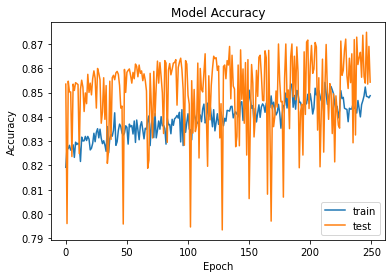

In [383]:
# summarization of history for accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

In [384]:
predictions = model.predict(X)

470/470 [==============================] - 0s 718us/step


# Making Another Model With Changing Activation Functions And Mini-Batch Gradient (Optimizer)

In [385]:
# Fix Random Seed For Reproducability
seed2 = 9
np.random.seed(seed2)

In [386]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential()     # 0 level
model2.add(Dense(14, input_dim = 10, activation = 'linear'))   #1st layer
model2.add(Dense(9, activation = 'linear'))    #2nd layer
model2.add(Dense(1, activation = 'sigmoid'))   #3rd layer or o/p layer

In [387]:
# Compile model
# Changing optimizer older = ada, new = adadelta

model2.compile(loss = 'binary_crossentropy', optimizer = 'adagrad', metrics = ['accuracy'])

In [388]:
# Fit the model
# Change epochs from 250, 200
fit_model2 = model2.fit(X, Y, validation_split = 0.33, epochs = 300, batch_size = 15)

Epoch 1/300
672/672 [==============================] - 1s 2ms/step - loss: 1.9374 - accuracy: 0.5922 - val_loss: 1.4619 - val_accuracy: 0.5563
Epoch 2/300
672/672 [==============================] - 1s 1ms/step - loss: 1.1454 - accuracy: 0.6238 - val_loss: 1.0975 - val_accuracy: 0.5964
Epoch 3/300
672/672 [==============================] - 1s 1ms/step - loss: 1.0243 - accuracy: 0.6432 - val_loss: 0.9691 - val_accuracy: 0.6272
Epoch 4/300
672/672 [==============================] - 1s 1ms/step - loss: 0.9487 - accuracy: 0.6587 - val_loss: 0.8634 - val_accuracy: 0.6671
Epoch 5/300
672/672 [==============================] - 1s 1ms/step - loss: 0.8860 - accuracy: 0.6722 - val_loss: 0.8414 - val_accuracy: 0.6565
Epoch 6/300
672/672 [==============================] - 1s 1ms/step - loss: 0.8361 - accuracy: 0.6821 - val_loss: 0.7559 - val_accuracy: 0.7094
Epoch 7/300
672/672 [==============================] - 1s 1ms/step - loss: 0.7973 - accuracy: 0.6899 - val_loss: 0.9310 - val_accuracy: 0.6347

Epoch 58/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4025 - accuracy: 0.7696 - val_loss: 0.3583 - val_accuracy: 0.7947
Epoch 59/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4014 - accuracy: 0.7730 - val_loss: 0.3529 - val_accuracy: 0.7993
Epoch 60/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4006 - accuracy: 0.7677 - val_loss: 0.3491 - val_accuracy: 0.8064
Epoch 61/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3988 - accuracy: 0.7710 - val_loss: 0.3597 - val_accuracy: 0.7933
Epoch 62/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3972 - accuracy: 0.7709 - val_loss: 0.3457 - val_accuracy: 0.8044
Epoch 63/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3952 - accuracy: 0.7751 - val_loss: 0.3457 - val_accuracy: 0.8042
Epoch 64/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3944 - accuracy: 0.7745 - val_loss: 0.3567 - val_accuracy:

Epoch 115/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3612 - accuracy: 0.7929 - val_loss: 0.3144 - val_accuracy: 0.8124
Epoch 116/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3610 - accuracy: 0.7910 - val_loss: 0.3104 - val_accuracy: 0.8160
Epoch 117/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3602 - accuracy: 0.7926 - val_loss: 0.3210 - val_accuracy: 0.8072
Epoch 118/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3600 - accuracy: 0.7936 - val_loss: 0.3130 - val_accuracy: 0.8130
Epoch 119/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3596 - accuracy: 0.7924 - val_loss: 0.3169 - val_accuracy: 0.8102
Epoch 120/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3594 - accuracy: 0.7927 - val_loss: 0.3135 - val_accuracy: 0.8132
Epoch 121/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3587 - accuracy: 0.7911 - val_loss: 0.3074 - val_ac

672/672 [==============================] - 1s 1ms/step - loss: 0.3494 - accuracy: 0.8014 - val_loss: 0.2997 - val_accuracy: 0.8233
Epoch 172/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3486 - accuracy: 0.7968 - val_loss: 0.3063 - val_accuracy: 0.8179
Epoch 173/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3493 - accuracy: 0.8006 - val_loss: 0.2983 - val_accuracy: 0.8271
Epoch 174/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3485 - accuracy: 0.8027 - val_loss: 0.2973 - val_accuracy: 0.8376
Epoch 175/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3489 - accuracy: 0.7994 - val_loss: 0.2995 - val_accuracy: 0.8243
Epoch 176/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3483 - accuracy: 0.8053 - val_loss: 0.2993 - val_accuracy: 0.8239
Epoch 177/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3482 - accuracy: 0.8017 - val_loss: 0.2964 - val_accuracy: 0.8322

672/672 [==============================] - 1s 1ms/step - loss: 0.3429 - accuracy: 0.8047 - val_loss: 0.3003 - val_accuracy: 0.8199
Epoch 228/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3428 - accuracy: 0.8070 - val_loss: 0.2926 - val_accuracy: 0.8344
Epoch 229/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3426 - accuracy: 0.8071 - val_loss: 0.2983 - val_accuracy: 0.8231
Epoch 230/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3429 - accuracy: 0.8060 - val_loss: 0.2959 - val_accuracy: 0.8267
Epoch 231/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3423 - accuracy: 0.8092 - val_loss: 0.2900 - val_accuracy: 0.8412
Epoch 232/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3423 - accuracy: 0.8066 - val_loss: 0.2976 - val_accuracy: 0.8239
Epoch 233/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3425 - accuracy: 0.8058 - val_loss: 0.2911 - val_accuracy: 0.8346

672/672 [==============================] - 1s 1ms/step - loss: 0.3384 - accuracy: 0.8115 - val_loss: 0.2861 - val_accuracy: 0.8418
Epoch 284/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3384 - accuracy: 0.8115 - val_loss: 0.2958 - val_accuracy: 0.8237
Epoch 285/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3384 - accuracy: 0.8110 - val_loss: 0.2891 - val_accuracy: 0.8358
Epoch 286/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3382 - accuracy: 0.8117 - val_loss: 0.2900 - val_accuracy: 0.8338
Epoch 287/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3381 - accuracy: 0.8089 - val_loss: 0.2858 - val_accuracy: 0.8440
Epoch 288/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3385 - accuracy: 0.8114 - val_loss: 0.2874 - val_accuracy: 0.8390
Epoch 289/300
672/672 [==============================] - 1s 1ms/step - loss: 0.3382 - accuracy: 0.8124 - val_loss: 0.2947 - val_accuracy: 0.8243

In [389]:
# Evaluating The Model
score2 = model2.evaluate(X, Y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))

470/470 [==============================] - 0s 856us/step - loss: 0.3200 - accuracy: 0.8260
accuracy: 82.60%


# Accuracy=83.06%

In [390]:
# Visualization of Training History, metric name and score

model2.metrics_names, score2, fit_model2.history.keys()

(['loss', 'accuracy'],
 [0.32003000378608704, 0.8259857892990112],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [391]:
fit_model2.history['accuracy']

[0.5921992659568787,
 0.6237594485282898,
 0.6432116031646729,
 0.6586939096450806,
 0.672191321849823,
 0.682115912437439,
 0.6898570656776428,
 0.6946209073066711,
 0.7027590274810791,
 0.710599422454834,
 0.7144700288772583,
 0.72052401304245,
 0.720821738243103,
 0.7262802720069885,
 0.7270742654800415,
 0.7294561266899109,
 0.731540322303772,
 0.7334259748458862,
 0.7333267331123352,
 0.7337237000465393,
 0.7392814755439758,
 0.7387852072715759,
 0.740770161151886,
 0.7444422245025635,
 0.7427550554275513,
 0.7445414662361145,
 0.7450377345085144,
 0.7482135891914368,
 0.749801516532898,
 0.7464271783828735,
 0.7486105561256409,
 0.7520841360092163,
 0.7504962086677551,
 0.7550615072250366,
 0.7515879273414612,
 0.7537713646888733,
 0.7537713646888733,
 0.7572449445724487,
 0.7577411532402039,
 0.7559547424316406,
 0.7583366632461548,
 0.7587336301803589,
 0.759130597114563,
 0.759329080581665,
 0.760123074054718,
 0.7612147927284241,
 0.759130597114563,
 0.7636958956718445,
 0.76

In [392]:
fit_model2.history['val_accuracy']

[0.5563167333602905,
 0.5964134335517883,
 0.6272416114807129,
 0.6671367883682251,
 0.656457781791687,
 0.7094499468803406,
 0.6346967816352844,
 0.7175095677375793,
 0.709248423576355,
 0.7003828287124634,
 0.7209349274635315,
 0.7211363911628723,
 0.7160991430282593,
 0.7523674964904785,
 0.7453153133392334,
 0.7703002095222473,
 0.7608301639556885,
 0.7021962404251099,
 0.7537779808044434,
 0.76828533411026,
 0.7580092549324036,
 0.7725166082382202,
 0.7670763731002808,
 0.76828533411026,
 0.7735241055488586,
 0.7642554640769958,
 0.7749345302581787,
 0.7827926874160767,
 0.7835986018180847,
 0.7737255692481995,
 0.7835986018180847,
 0.7831956744194031,
 0.7717106342315674,
 0.7876284718513489,
 0.7882329225540161,
 0.7900463342666626,
 0.7888373732566833,
 0.7882329225540161,
 0.7795687913894653,
 0.7763449549674988,
 0.7789643406867981,
 0.7856135368347168,
 0.789038896560669,
 0.790449321269989,
 0.790449321269989,
 0.7819867134094238,
 0.7950836420059204,
 0.7894418835639954,
 

In [393]:
fit_model2.history['loss']

[1.937442660331726,
 1.1454015970230103,
 1.0243308544158936,
 0.9487303495407104,
 0.8859603404998779,
 0.8360919952392578,
 0.7972588539123535,
 0.7636990547180176,
 0.7352081537246704,
 0.711310088634491,
 0.6876779198646545,
 0.6685442924499512,
 0.6512162089347839,
 0.6337605714797974,
 0.6207333207130432,
 0.6060085296630859,
 0.5937402248382568,
 0.5814744234085083,
 0.5716930031776428,
 0.560875654220581,
 0.5519789457321167,
 0.5431429147720337,
 0.5350624322891235,
 0.5260459184646606,
 0.5196480751037598,
 0.5125061869621277,
 0.5055301189422607,
 0.5008553266525269,
 0.49357539415359497,
 0.4881027638912201,
 0.4832884967327118,
 0.47761106491088867,
 0.4748072922229767,
 0.46720194816589355,
 0.46424949169158936,
 0.45974406599998474,
 0.4555973708629608,
 0.45138514041900635,
 0.4490430951118469,
 0.44604864716529846,
 0.44182634353637695,
 0.4394691586494446,
 0.43635615706443787,
 0.43258756399154663,
 0.43049749732017517,
 0.4267178773880005,
 0.4250260591506958,
 0.42

In [394]:
fit_model2.history['val_loss']

[1.4618974924087524,
 1.097477912902832,
 0.9691330194473267,
 0.8633503317832947,
 0.8413897752761841,
 0.7558982372283936,
 0.9309566617012024,
 0.6871270537376404,
 0.6768836379051208,
 0.6880317330360413,
 0.6365215182304382,
 0.6256986260414124,
 0.635013997554779,
 0.5677016377449036,
 0.5702081918716431,
 0.5363064408302307,
 0.5325044989585876,
 0.6705537438392639,
 0.5385952591896057,
 0.5067127346992493,
 0.5225905776023865,
 0.4833047389984131,
 0.4975109398365021,
 0.4899354875087738,
 0.4701327383518219,
 0.5009191036224365,
 0.4602183699607849,
 0.4386855661869049,
 0.4384393095970154,
 0.4503444731235504,
 0.4294252097606659,
 0.42696869373321533,
 0.4533891975879669,
 0.41052666306495667,
 0.4062283933162689,
 0.40243348479270935,
 0.40243393182754517,
 0.40054911375045776,
 0.41969963908195496,
 0.42676424980163574,
 0.41412708163261414,
 0.3988175690174103,
 0.38783344626426697,
 0.3886333107948303,
 0.3836961090564728,
 0.3994491398334503,
 0.37406376004219055,
 0.37

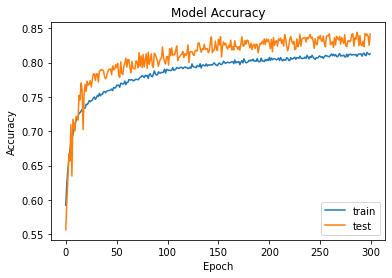

In [395]:
plt.plot(fit_model2.history['accuracy'])
plt.plot(fit_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

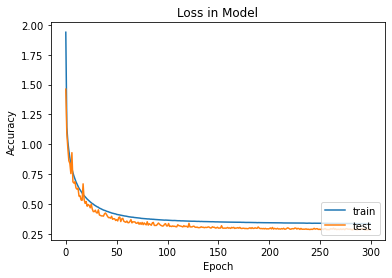

In [396]:
# Summarization of history for loss
plt.plot(fit_model2.history['loss'])
plt.plot(fit_model2.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

# Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [397]:
# fix random seed for reproducibility
seed3 = 10
np.random.seed(seed3)

In [398]:
# creating model with ["sigmoid" and "logistic"]
model3 = Sequential()   # 0 level
model3.add(Dense(14, input_dim = 10 , activation = 'relu'))  # FIRST LAYER
model3.add(Dense(9, activation = 'sigmoid'))  #2nd layer
model3.add(Dense(1, activation = 'tanh'))   #3rd layer or op layer

In [399]:
# Fit the model
# Change epochs
model3.compile(loss = 'binary_crossentropy', optimizer = 'adagrad', metrics = ['accuracy'])

In [400]:
# Fit the model
# Change epochs
fit_model3 = model3.fit(X, Y, validation_split = 0.33, epochs = 300, batch_size = 15)

Epoch 1/300
672/672 [==============================] - 2s 2ms/step - loss: 0.7247 - accuracy: 0.5224 - val_loss: 0.7250 - val_accuracy: 0.4824
Epoch 2/300
672/672 [==============================] - 1s 1ms/step - loss: 0.7022 - accuracy: 0.5224 - val_loss: 0.7112 - val_accuracy: 0.4824
Epoch 3/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6966 - accuracy: 0.5224 - val_loss: 0.7050 - val_accuracy: 0.4824
Epoch 4/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6944 - accuracy: 0.5224 - val_loss: 0.7018 - val_accuracy: 0.4824
Epoch 5/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5224 - val_loss: 0.7000 - val_accuracy: 0.4824
Epoch 6/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6928 - accuracy: 0.5224 - val_loss: 0.6987 - val_accuracy: 0.4824
Epoch 7/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.5224 - val_loss: 0.6979 - val_accuracy: 0.4824

Epoch 58/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 59/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 60/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 61/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 62/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 63/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 64/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy:

Epoch 115/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 116/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 117/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 118/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 119/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 120/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 121/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_ac

672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 172/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 173/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 174/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 175/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 176/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 177/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824

672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 228/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 229/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 230/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 231/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 232/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 233/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824

672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 284/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 285/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 286/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 287/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 288/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 289/300
672/672 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4824

In [401]:
# Evaluating the Model
score3 = model3.evaluate(X, Y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

470/470 [==============================] - 0s 811us/step - loss: 0.6933 - accuracy: 0.5092
accuracy: 50.92%


# Accuracy = 49.08%

In [403]:
# Visualization of Training History, metrics name and score
model3.metrics_names, score3, fit_model3.history.keys()

(['loss', 'accuracy'],
 [0.693324625492096, 0.509209394454956],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

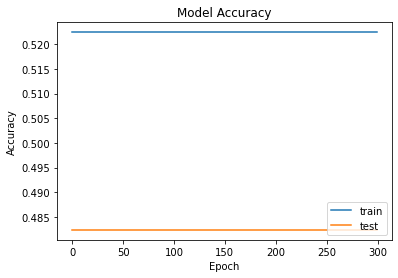

In [405]:
# Summarization of history for accuracy
plt.plot(fit_model3.history['accuracy'])
plt.plot(fit_model3.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

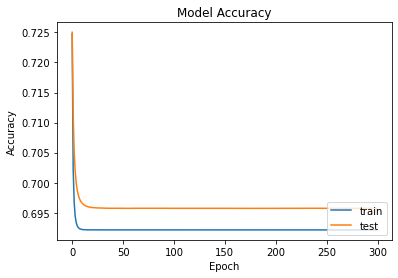

In [407]:
# Summarization of history for loss
plt.plot(fit_model3.history['loss'])
plt.plot(fit_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Here in this graphs Test line almost overlap on tha Train line, it's look like similar.

# AS per calcluation "relu" activation function helping to increase accuracy

# Decision Tree
Model Building , Training and Testing

In [409]:
gast['TEY'].unique()

array([0, 1], dtype=int64)

In [410]:
x = gast.drop('TEY', axis = 1)
y = gast['TEY']
print(y)
x

0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY, Length: 15039, dtype: int64


AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [411]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

# Building Decision Tree Classifier Using Entropy Criteria

In [412]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

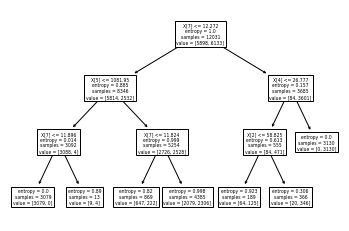

In [413]:
#Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [414]:
y_train.value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [415]:
gast.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX',
       'TEY'],
      dtype='object')

In [416]:
gast['TEY'].value_counts()

1    7658
0    7381
Name: TEY, dtype: int64

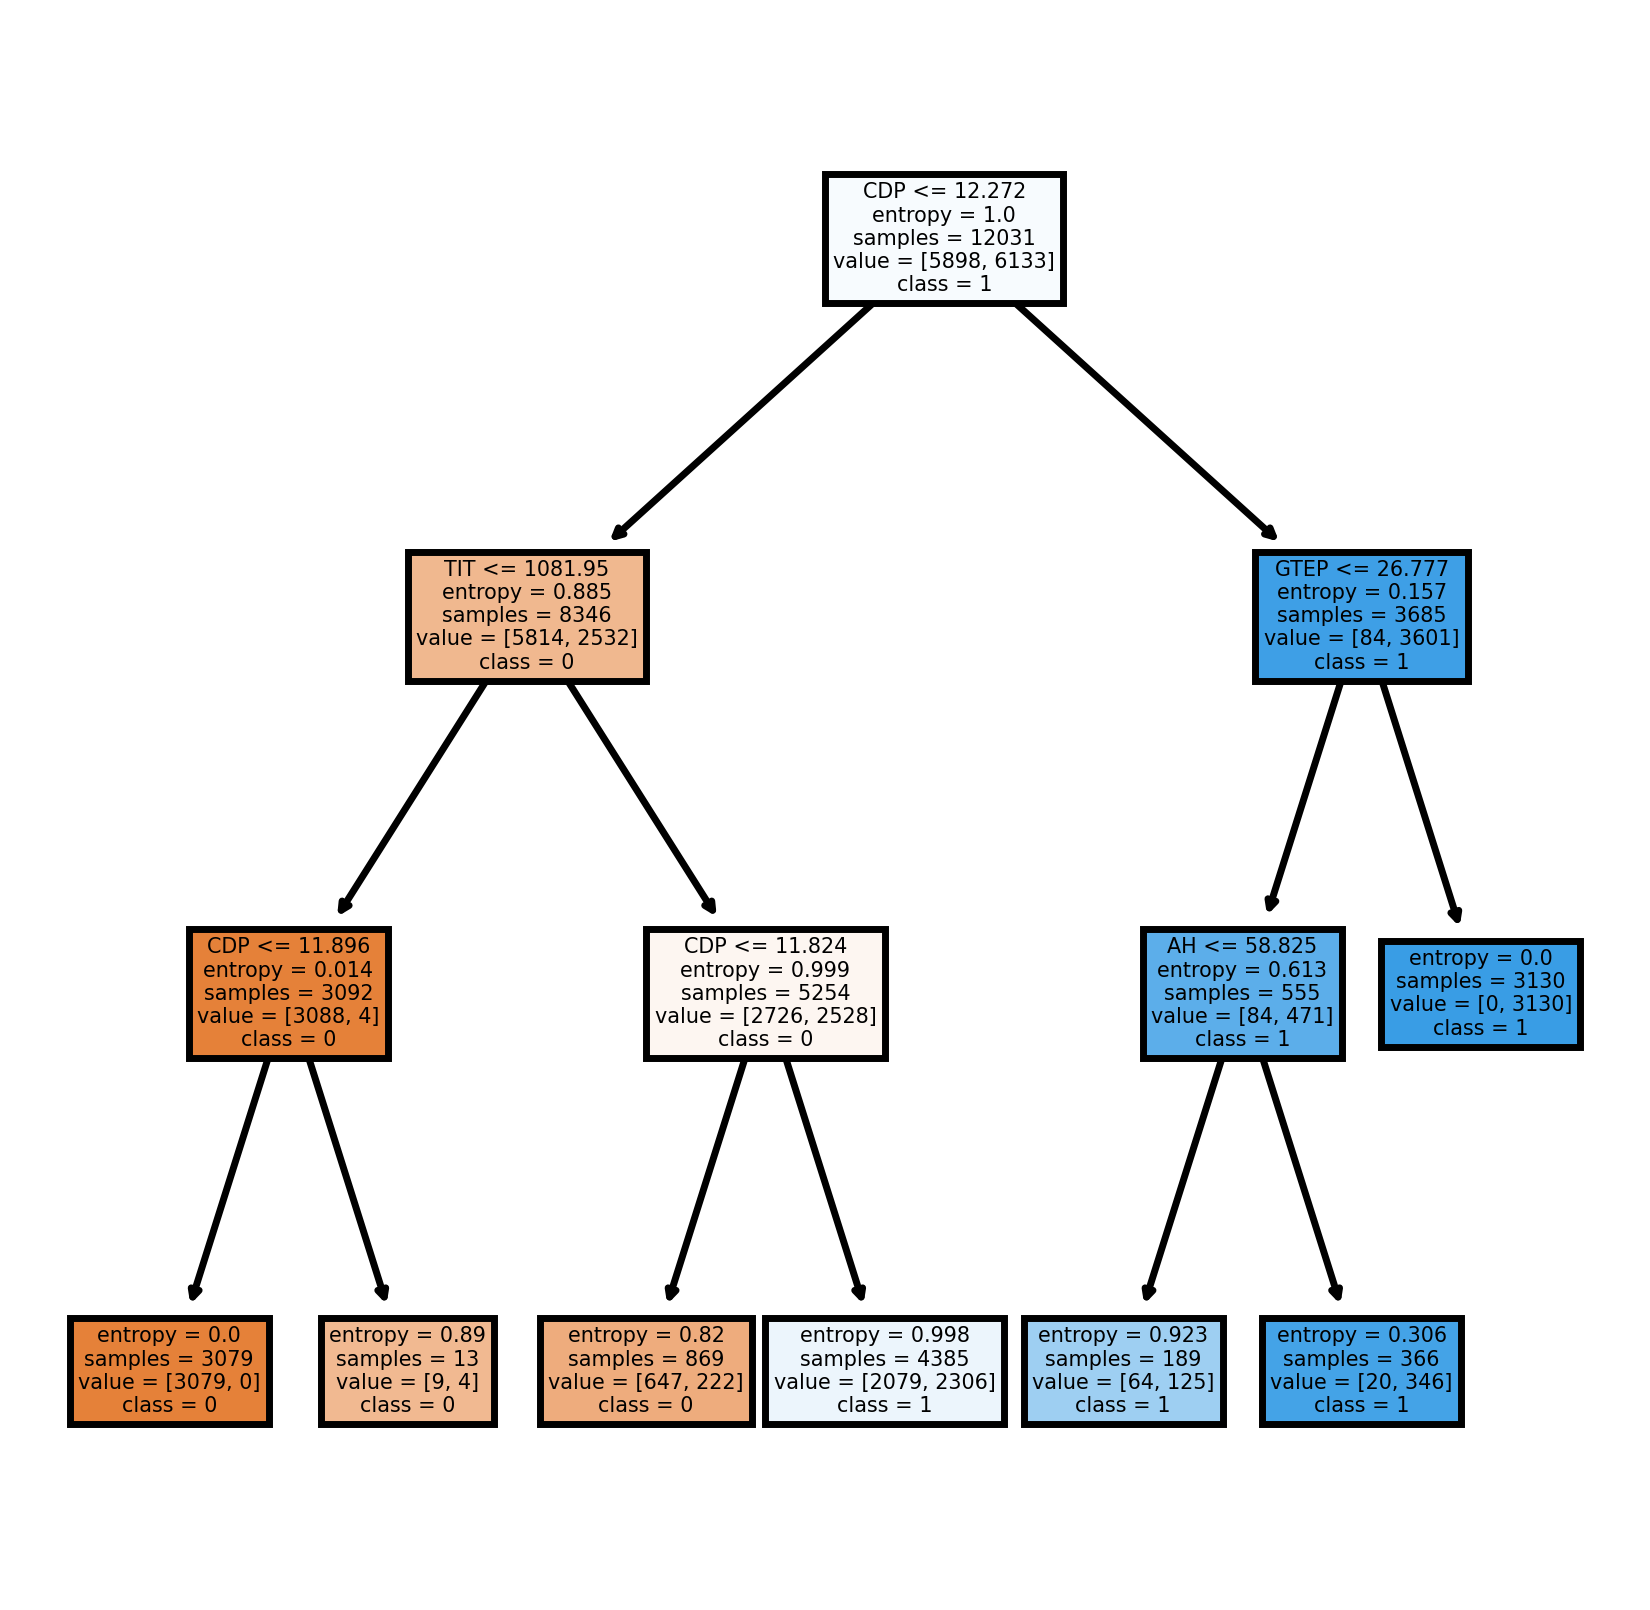

In [417]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [418]:
# Predicting on test data
preds = model.predict(x_test)   # Predicting on test data set
pd.Series(preds).value_counts()   #Getting the count of each category

1    1993
0    1015
dtype: int64

In [419]:
y_test.value_counts()

1    1525
0    1483
Name: TEY, dtype: int64

In [420]:
preds

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [421]:
pd.crosstab(y_test, preds)  # Getting the 2 way table to understand the correct and wrong predictions

col_0    0     1
TEY             
0      958   525
1       57  1468

In [422]:
preds, y_test

(array([1, 1, 1, ..., 0, 0, 1], dtype=int64),
 11682    1
 7392     1
 6700     1
 11742    1
 5012     1
         ..
 11165    0
 768      1
 10533    0
 7017     0
 14176    1
 Name: TEY, Length: 3008, dtype: int64)

In [423]:
#Accuracy
from sklearn.metrics import accuracy_score
import numpy as np

np.mean(preds == y_test), accuracy_score(y_test, preds)

(0.8065159574468085, 0.8065159574468085)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [424]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [425]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [426]:
# Prediction and Computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

0.8065159574468085

# Decision Tree Regression Example

In [427]:
# Decision tree Regression
from sklearn.tree import DecisionTreeRegressor

In [428]:
array = gast.values
X = array[:,:-1]
Y = array[:,-1]
print(X)
print(Y)

[[   6.8594 1007.9      96.799  ...   10.605     3.1547   82.722 ]
 [   6.785  1008.4      97.118  ...   10.598     3.2363   82.776 ]
 [   6.8977 1008.8      95.939  ...   10.601     3.2012   82.468 ]
 ...
 [   7.2647 1006.3      99.496  ...   10.483     7.9632   90.912 ]
 [   7.006  1006.8      99.008  ...   10.533     6.2494   93.227 ]
 [   6.9279 1007.2      97.533  ...   10.583     4.9816   92.498 ]]
[0. 0. 0. ... 0. 0. 0.]


In [429]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [430]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [431]:
# Find The Accuracy
model.score(X_test, Y_test)

0.5014648199402758

# Logistic Regression

In [432]:
from sklearn.linear_model import LogisticRegression
import pickle

In [433]:
# we already Divided dataset into input and output(I.e. model building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [434]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [435]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [436]:
y_pred_ffire = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})

In [437]:
y_pred_ffire

actual  predicted_prob
0         0.0             0.0
1         0.0             0.0
2         0.0             0.0
3         0.0             0.0
4         0.0             0.0
...       ...             ...
15034     0.0             0.0
15035     0.0             0.0
15036     0.0             0.0
15037     0.0             0.0
15038     0.0             0.0

[15039 rows x 2 columns]

In [438]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      7381
         1.0       0.89      0.89      0.89      7658

    accuracy                           0.89     15039
   macro avg       0.89      0.89      0.89     15039
weighted avg       0.89      0.89      0.89     15039



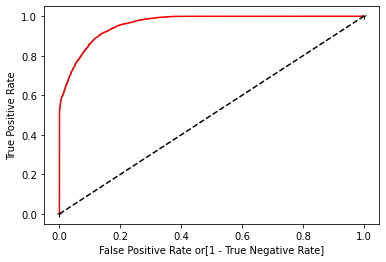

In [439]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or[1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [440]:
auc*100   # Accuracy

88.56081656228507

# KNN Classification

In [441]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [442]:
kfold = KFold(n_splits = 10)

In [443]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is: ", results.mean()*100)

[0.81848404 0.86170213 0.77925532 0.73404255 0.77726064 0.7393617
 0.87234043 0.81117021 0.82845745 0.82102462]
Accuracy is:  80.4309908551691


In [444]:
# Grid Search for algorithm tuning
from sklearn.model_selection import GridSearchCV
import numpy as np
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [445]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [446]:
print(grid.best_score_)

0.7987926221794537


# SVC

In [447]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [448]:
# Take a sample of data set for training and testing.
array = gast.values
X = array[:,:-1]
Y = array[:,-1]
print(X)
print(Y)

[[   6.8594 1007.9      96.799  ...   10.605     3.1547   82.722 ]
 [   6.785  1008.4      97.118  ...   10.598     3.2363   82.776 ]
 [   6.8977 1008.8      95.939  ...   10.601     3.2012   82.468 ]
 ...
 [   7.2647 1006.3      99.496  ...   10.483     7.9632   90.912 ]
 [   7.006  1006.8      99.008  ...   10.533     6.2494   93.227 ]
 [   6.9279 1007.2      97.533  ...   10.583     4.9816   92.498 ]]
[0. 0. 0. ... 0. 0. 0.]


In [449]:
gast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.3 MB


In [450]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Creating training and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [451]:
# Training a SVM classifier using SVC class
svm = SVC(kernel = 'linear', random_state = 1, C = 0.1)
svm.fit(X_train_std, Y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [452]:
# Mode performance
y_pred = svm.predict(X_test_std)
print("Accuracy: %.3f" % accuracy_score(Y_test, y_pred))

Accuracy: 0.902


# Accuracy is very small so we predict model using SVM

In [453]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [454]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [455]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((10527, 10), (4512, 10), (10527,), (4512,))

In [ ]:
SVMC = SVC(random_state=42)

svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'], 
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'C': [1000, 100, 10, 1],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(X_train,Y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

In [ ]:
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma' : [0.5,0.1,0.1], 'C':[10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(X_train, Y_train)

In [ ]:
gsv.best_params_, gsv.best_score_

In [ ]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy is: ", acc)
confusion_matrix(Y_test, y_pred)